In [1]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [2]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json
from scipy.integrate import trapz

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import matplotlib.pyplot as plt
import warnings

import re
from sklearn.mixture import GaussianMixture
import tqdm

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [3]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [4]:
name_of_project = 'AMP'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

The directory 'Projects/AMP/mzml' does not exist. Please try again with a valid directory.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [5]:
# Set default values
data_base_name_location = 'lipid_database/AMP_Database_OzOFF.xlsx'
Project = './Projects/'
Project_Name = 'AMP'
Project_Folder_data = Project + Project_Name + '/fame_mix/off/'
Project_results = Project + Project_Name + '/results/fame_mix/'
file_name_to_save = 'AMP'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/AMP_Database_OzOFF.xlsx
Project: ./Projects/
Project_Name: AMP
Project_Folder_data: ./Projects/AMP/fame_mix/off/
Project_results: ./Projects/AMP/results/fame_mix/
file_name_to_save: AMP
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [6]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [7]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/AMP/fame_mix/off/11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3off_01.mzML

Finished parsing all mzML files



In [8]:
df_MRM.head(None)

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,FA,5.930616e+04,4:0,255.2,183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
1,NaN,5.508592e+04,NaN,269.1,183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,269.1 -> 183.0
2,FA,6.219342e+04,6:0,283.1,183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0
3,FA,6.080362e+04,6:0,283.3,183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.3 -> 183.0
4,NaN,5.338146e+04,NaN,297.2,183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,297.2 -> 183.0
5,NaN,5.777996e+04,NaN,309.1,183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,309.1 -> 183.0
6,FA,1.230390e+05,8:0,311.3,183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,311.3 -> 183.0
7,NaN,6.620772e+04,NaN,323.2,183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,323.2 -> 183.0
8,NaN,7.919007e+04,NaN,325.2,183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,325.2 -> 183.0
9,NaN,9.179089e+04,NaN,337.2,183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,337.2 -> 183.0


In [9]:
df_OzESI

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,255.2,183.0,0.024400,41.220001,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
1,NaN,255.2,183.0,0.050617,63.000004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
2,NaN,255.2,183.0,0.076850,102.880005,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
3,NaN,255.2,183.0,0.103083,130.680008,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
4,NaN,255.2,183.0,0.129317,110.940010,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
...,...,...,...,...,...,...,...
58390,NaN,533.5,183.0,28.252500,41.300003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
58391,NaN,533.5,183.0,28.278733,41.340004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
58392,NaN,533.5,183.0,28.304967,41.360004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
58393,NaN,533.5,183.0,28.331200,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0


In [10]:
filtered_df = df_OzESI[df_OzESI['Parent_Ion'] == 283.1]
filtered_df 


,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
2162,NaN,283.1,183.0,0.023483,121.360008,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0
2163,NaN,283.1,183.0,0.049717,96.600006,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0
2164,NaN,283.1,183.0,0.075933,71.140007,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0
2165,NaN,283.1,183.0,0.102167,52.620003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0
2166,NaN,283.1,183.0,0.128400,49.040005,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0
...,...,...,...,...,...,...,...
3238,NaN,283.1,183.0,28.250317,79.680008,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0
3239,NaN,283.1,183.0,28.276550,97.080009,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0
3240,NaN,283.1,183.0,28.302783,82.140007,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0
3241,NaN,283.1,183.0,28.329017,47.700005,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0


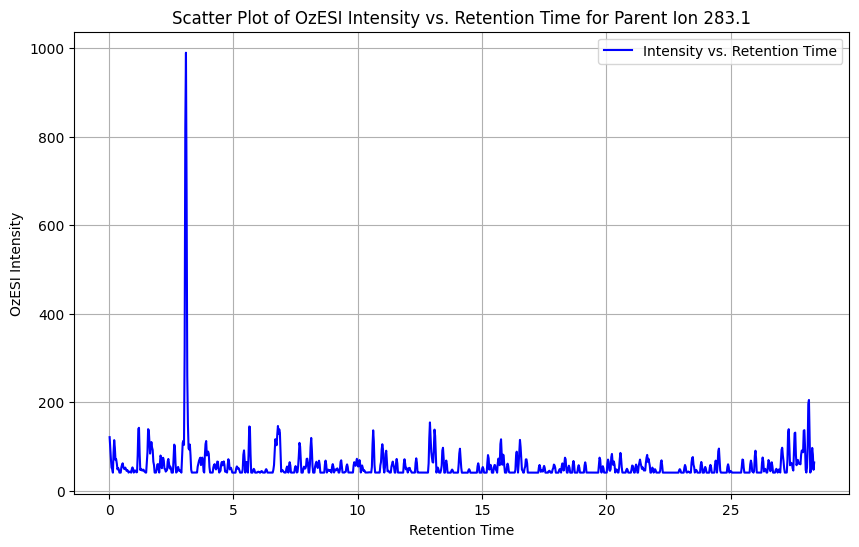

In [11]:
import matplotlib.pyplot as plt

filtered_df = df_OzESI[df_OzESI['Parent_Ion'] == 283.1]
filtered_df 

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Retention_Time'], filtered_df['OzESI_Intensity'], color='blue', label='Intensity vs. Retention Time')
plt.title('Scatter Plot of OzESI Intensity vs. Retention Time for Parent Ion 283.1')
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# # save df_OzESI and df_MRM to excel file in folder lipid_platform/Projects/aspire
# df_OzESI.to_excel(Project_results + 'df_OzESI.xlsx')
# df_MRM.to_excel(Project_results + 'df_MRM.xlsx')

# CLASSES for data analysis

# CLASS Parse, match lipids, add parameter columns from sample_ID, 

In [13]:
import pandas as pd

class RawDataParser:
    def __init__(self, df_MRM, df_OzESI):
        self.df_MRM = df_MRM
        self.df_OzESI = df_OzESI
    
    def create_match_group(self, df):
        df['Match_Group'] = df.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()
        return df
    
    def filter_retention_time(self, df, retention_time_range):
        df_filtered = df[(df['Retention_Time'] >= retention_time_range[0]) & (df['Retention_Time'] <= retention_time_range[1])]
        return df_filtered
    
    def is_within_tolerance(self, ion1, ion2, tolerance=0.3):
        return abs(ion1 - ion2) <= tolerance
    
    def match_lipids(self, d1a, d1b):
        if 'Match_Group' not in d1a.columns:
            d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()
        
        d1b['Match_Group'] = d1a['Match_Group']
        d1b['Lipid'] = None
        
        for group in d1a['Match_Group'].unique():
            group_row = d1a[d1a['Match_Group'] == group].iloc[0]
            
            for _, mrm_row in self.df_MRM.iterrows():
                if self.is_within_tolerance(group_row['Parent_Ion'], mrm_row['Parent_Ion']) and self.is_within_tolerance(group_row['Product_Ion'], mrm_row['Product_Ion']):
                    d1b.loc[d1b['Match_Group'] == group, 'Lipid'] = mrm_row['Lipid']
                    break
        
        return d1b
    
    def extract_details_from_sample_id(self, df, column_name='Sample_ID', new_columns=None):
        if new_columns is None or not isinstance(new_columns, dict):
            raise ValueError("new_columns must be a dictionary with column names as keys and list of strings as values")
        
        for col, values in new_columns.items():
            pattern = f"(?P<{col}>{'|'.join(values)})"
            df_extracted = df[column_name].str.extract(pattern)
            df = pd.concat([df, df_extracted[[col]]], axis=1)
        
        return df
   
    def extract_fac_values(self, df):
        def extract_fac(lipid):
            if pd.isna(lipid):
                return []
            return re.findall(r'\d+:\d+', lipid)
        
        df['FAC'] = df['Lipid'].apply(extract_fac)
        return df
    
    def group(self, df, group_columns=None):
        if group_columns is None:
            group_columns = ['Lipid', 'Sample_ID','Biology','Genotype','Mouse','Cage']
        
        if not isinstance(group_columns, list):
            raise ValueError("group_columns must be a list of column names")
        
        invalid_columns = set(group_columns) - set(df.columns)
        if invalid_columns:
            raise ValueError(f"The following columns are not present in the DataFrame: {', '.join(invalid_columns)}")
        
        df['Group_Sample'] = df.groupby(group_columns).ngroup()
        return df
    
    def parse_data(self, retention_time_range, new_columns, group_columns=None):
        self.df_MRM = self.create_match_group(self.df_MRM)
        
        d1 = self.df_OzESI.iloc[:, 1:]
        d1a = self.filter_retention_time(d1, retention_time_range)
        d1a = self.create_match_group(d1a)
        
        d1b = d1a.copy()
        d1b = self.match_lipids(d1a, d1b)
        
        d1c = d1b.copy()
        d1c = self.extract_details_from_sample_id(d1c, new_columns=new_columns)
        d1c = self.extract_fac_values(d1c)
        
        d1d = d1c.copy()
        d1d = self.group(d1d, group_columns)
        
        return d1d
    
    def plot_full_spectrum(self, d1a):
        plt.figure(figsize=(10, 6))
        plt.scatter(d1a['Retention_Time'], d1a['OzESI_Intensity'])
        plt.xlabel('Retention Time')
        plt.ylabel('OzESI Intensity')
        plt.title('Retention Time vs OzESI Intensity')
        plt.show()

In [14]:
parser = RawDataParser(df_MRM, df_OzESI)
# Define the retention time range and new columns
retention_time_range = (0, 15)
new_columns = {'Biology': ['cortex', 'dienc', 'hippo', 'cereb'],
               'Genotype': ['5xFAD', 'WT'],
               'Cage': ['FAD231', 'FAD245', 'FAD249', 'FAD257', 'FAD263'],
               'Mouse': ['m1', 'm2', 'm3', 'm4', 'm5']}
#group data
group_columns = ['Lipid', 'Sample_ID', 'Biology', 'Genotype', 'Mouse', 'Cage']

#group columns of STANDARDS
group_columns = ['Lipid']

# Parse the data
parsed_data = parser.parse_data(retention_time_range, new_columns, group_columns)

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


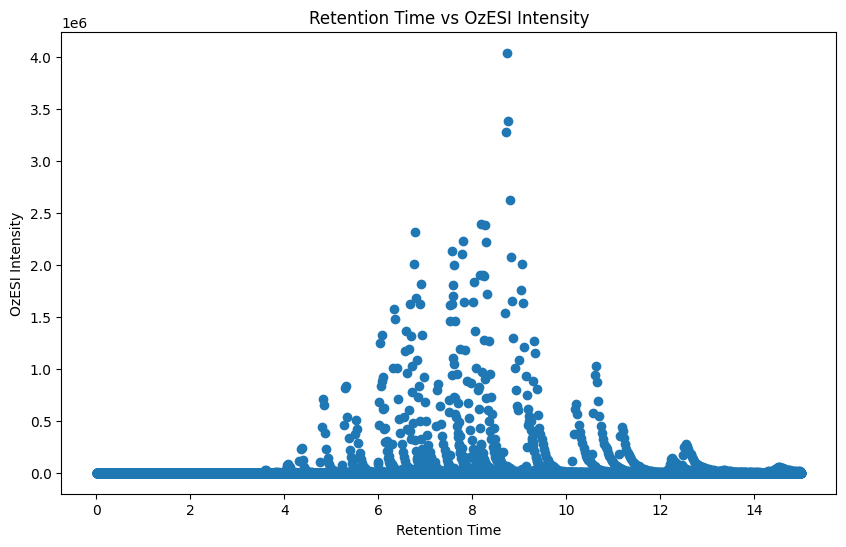

In [15]:
# Plot the full spectrum
parser.plot_full_spectrum(parsed_data)

In [16]:
parsed_data

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,FAC,Group_Sample
0,255.2,183.0,0.024400,41.220001,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0,NaN,NaN,NaN,NaN,[4:0],29
1,255.2,183.0,0.050617,63.000004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0,NaN,NaN,NaN,NaN,[4:0],29
2,255.2,183.0,0.076850,102.880005,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0,NaN,NaN,NaN,NaN,[4:0],29
3,255.2,183.0,0.103083,130.680008,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0,NaN,NaN,NaN,NaN,[4:0],29
4,255.2,183.0,0.129317,110.940010,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0,NaN,NaN,NaN,NaN,[4:0],29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57880,533.5,183.0,14.873617,41.160004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1,NaN,NaN,NaN,NaN,[24:1],28
57881,533.5,183.0,14.899850,41.180004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1,NaN,NaN,NaN,NaN,[24:1],28
57882,533.5,183.0,14.926083,41.200005,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1,NaN,NaN,NaN,NaN,[24:1],28
57883,533.5,183.0,14.952317,41.180004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1,NaN,NaN,NaN,NaN,[24:1],28


In [17]:
import pandas as pd

# Assuming 'parsed_data' is your initial DataFrame
# Filter the DataFrame for rows where 'Parent_Ion' is 283.1 and 'Retention_Time' is between 5 and 8
filtered_df = parsed_data[(parsed_data['Parent_Ion'] == 283.1) & (parsed_data['Retention_Time'] >= 5) & (parsed_data['Retention_Time'] <= 8)]

filtered_df


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,FAC,Group_Sample
2352,283.1,183.0,5.007767,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0,2,6:0,NaN,NaN,NaN,NaN,[6:0],30
2353,283.1,183.0,5.034000,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0,2,6:0,NaN,NaN,NaN,NaN,[6:0],30
2354,283.1,183.0,5.060233,41.300003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0,2,6:0,NaN,NaN,NaN,NaN,[6:0],30
2355,283.1,183.0,5.086467,41.200005,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0,2,6:0,NaN,NaN,NaN,NaN,[6:0],30
2356,283.1,183.0,5.112700,50.780003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0,2,6:0,NaN,NaN,NaN,NaN,[6:0],30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,283.1,183.0,7.893417,50.620003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0,2,6:0,NaN,NaN,NaN,NaN,[6:0],30
2463,283.1,183.0,7.919650,54.740005,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0,2,6:0,NaN,NaN,NaN,NaN,[6:0],30
2464,283.1,183.0,7.945883,72.140007,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0,2,6:0,NaN,NaN,NaN,NaN,[6:0],30
2465,283.1,183.0,7.972117,72.840004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1 -> 183.0,2,6:0,NaN,NaN,NaN,NaN,[6:0],30


In [18]:
# import pandas as pd

# # Assuming 'parsed_data' is your initial DataFrame
# # Filter the DataFrame for rows where 'Parent_Ion' is 283.1 and 'Retention_Time' is between 5 and 8
# filtered_df = parsed_data[(parsed_data['Parent_Ion'] == 283.1) & (parsed_data['Retention_Time'] >= 5) & (parsed_data['Retention_Time'] <= 8)]

# filtered_df

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(filtered_df['Retention_Time'], filtered_df['OzESI_Intensity'], color='blue', label='Intensity vs. Retention Time')
# plt.title('Scatter Plot of OzESI Intensity vs. Retention Time for Parent Ion 283.1')
# plt.xlabel('Retention Time')
# plt.ylabel('OzESI Intensity')
# plt.legend()
# plt.grid(True)
# plt.show()


# NEW SCIPY PEAK FINDER FIND PEAKS

In [19]:
# import pandas as pd
# from scipy.signal import find_peaks

# def find_lipid_peaks(df, use_match_group=True, height=None, width=None):
#     """
#     Find peaks in lipid data based on retention time and intensity.
    
#     Parameters:
#     - df: pandas DataFrame containing lipid data.
#     - use_match_group: boolean flag to determine filtering by 'Match_Group' or 'Group_Sample'.
#     - height: Minimum height of peaks. Used as a threshold for peak intensity.
#     - width: Minimum width of peaks in number of samples. Helps in distinguishing real peaks from noise.
    
#     Returns:
#     - peaks_df: DataFrame containing the peak data.
#     """
#     # Select the column for filtering based on user input
#     filter_col = 'Match_Group' if use_match_group else 'Group_Sample'
    
#     # Filter the DataFrame based on the unique values in the selected column
#     unique_groups = df[filter_col].unique()
    
#     # Prepare a list to collect peak data
#     peak_data = []
    
#     for group in unique_groups:
#         # Filter data for the current group
#         group_data = df[df[filter_col] == group]
        
#         # Find peaks in the OzESI_Intensity column with the given height and width thresholds
#         peaks, _ = find_peaks(group_data['OzESI_Intensity'], height=height, width=width)
        
#         # Extract peak data
#         for peak in peaks:
#             peak_data.append({
#                 'Retention_Time': group_data.iloc[peak]['Retention_Time'],
#                 'OzESI_Intensity': group_data.iloc[peak]['OzESI_Intensity'],
#                 filter_col: group,
#                 'Sample_ID': group_data.iloc[peak]['Sample_ID']
#             })
    
#     # Create a DataFrame from the collected peak data
#     peaks_df = pd.DataFrame(peak_data)
    
#     return peaks_df

# # Example usage
# # Assuming 'filtered_df' is your DataFrame containing the data
# # Set height and width based on analysis requirements
# peaks_df = find_lipid_peaks(filtered_df, use_match_group=True, height=50000, width=2)
# peaks_df

In [20]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from scipy.signal import find_peaks, peak_widths

# def plot_data_and_peaks(parsed_data):
#     # Filter the DataFrame for rows where 'Parent_Ion' is 283.1 and 'Retention_Time' is between 5 and 8
#     filtered_df = parsed_data[(parsed_data['Parent_Ion'] == 283.1) & (parsed_data['Retention_Time'] >= 5) & (parsed_data['Retention_Time'] <= 8)]

#     # Plotting all data
#     plt.figure(figsize=(10, 6))
#     plt.plot(filtered_df['Retention_Time'], filtered_df['OzESI_Intensity'], color='blue', label='Intensity vs. Retention Time')
#     plt.title('Scatter Plot of OzESI Intensity vs. Retention Time for Parent Ion 283.1')
#     plt.xlabel('Retention Time')
#     plt.ylabel('OzESI Intensity')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     # Finding peaks
#     peaks, properties = find_peaks(filtered_df['OzESI_Intensity'], height=50000)  # Adjust the height parameter as needed
#     results_half = peak_widths(filtered_df['OzESI_Intensity'], peaks, rel_height=0.5)

#     # Plotting peaks with start and stop points
#     plt.figure(figsize=(10, 6))
#     plt.plot(filtered_df['Retention_Time'], filtered_df['OzESI_Intensity'], color='gray', alpha=0.5, label='Full Data')
#     plt.scatter(filtered_df.iloc[peaks]['Retention_Time'], filtered_df.iloc[peaks]['OzESI_Intensity'], color='red', zorder=5)
#     for peak, left_ips, right_ips in zip(peaks, results_half[2], results_half[3]):
#         plt.axvline(x=filtered_df.iloc[int(left_ips)]['Retention_Time'], color='green', linestyle=':', linewidth=1, label='Start of Peak')
#         plt.axvline(x=filtered_df.iloc[int(right_ips)]['Retention_Time'], color='blue', linestyle=':', linewidth=1, label='End of Peak')
#     plt.title('Detected Peaks with Start and Stop Points')
#     plt.xlabel('Retention Time')
#     plt.ylabel('Intensity')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Example usage
# # Assuming 'parsed_data' is your DataFrame containing the data
# plot_data_and_peaks(parsed_data)


# New peak analysis class using scipy peak finder

In [21]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks, peak_widths

# class PeakAnalysis:
#     def __init__(self, data):
#         self.data = data

#     def find_lipid_peaks(self, use_match_group=True, height=None, width=None):
#         """
#         Find peaks in lipid data based on retention time and intensity.

#         Parameters:
#         - use_match_group: boolean flag to determine filtering by 'Match_Group' or 'Group_Sample'.
#         - height: Minimum height of peaks. Used as a threshold for peak intensity.
#         - width: Minimum width of peaks in number of samples. Helps in distinguishing real peaks from noise.

#         Returns:
#         - peaks_df: DataFrame containing the peak data.
#         """
#         filter_col = 'Match_Group' if use_match_group else 'Group_Sample'
#         unique_groups = self.data[filter_col].unique()
#         peak_data = []

#         for group in unique_groups:
#             group_data = self.data[self.data[filter_col] == group]
#             peaks, _ = find_peaks(group_data['OzESI_Intensity'], height=height, width=width)
#             for peak in peaks:
#                 peak_data.append({
#                     'Retention_Time': group_data.iloc[peak]['Retention_Time'],
#                     'OzESI_Intensity': group_data.iloc[peak]['OzESI_Intensity'],
#                     filter_col: group,
#                     'Sample_ID': group_data.iloc[peak]['Sample_ID']
#                 })

#         return pd.DataFrame(peak_data)

#     def plot_data_and_peaks(self, parent_ion, rt_min, rt_max):
#         """
#         Plot data and peaks for specified parent ion and retention time range.

#         Parameters:
#         - parent_ion: the ion to filter data on.
#         - rt_min: minimum retention time.
#         - rt_max: maximum retention time.
#         """
#         filtered_df = self.data[(self.data['Parent_Ion'] == parent_ion) & (self.data['Retention_Time'] >= rt_min) & (self.data['Retention_Time'] <= rt_max)]
        
#         plt.figure(figsize=(10, 6))
#         plt.plot(filtered_df['Retention_Time'], filtered_df['OzESI_Intensity'], color='blue', label='Intensity vs. Retention Time')
#         plt.title(f'Scatter Plot of OzESI Intensity vs. Retention Time for Parent Ion {parent_ion}')
#         plt.xlabel('Retention Time')
#         plt.ylabel('OzESI Intensity')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

#         peaks, properties = find_peaks(filtered_df['OzESI_Intensity'], height=50000)
#         results_half = peak_widths(filtered_df['OzESI_Intensity'], peaks, rel_height=0.5)

#         plt.figure(figsize=(10, 6))
#         plt.plot(filtered_df['Retention_Time'], filtered_df['OzESI_Intensity'], color='gray', alpha=0.5, label='Full Data')
#         plt.scatter(filtered_df.iloc[peaks]['Retention_Time'], filtered_df.iloc[peaks]['OzESI_Intensity'], color='red', zorder=5)
#         for peak, left_ips, right_ips in zip(peaks, results_half[2], results_half[3]):
#             plt.axvline(x=filtered_df.iloc[int(left_ips)]['Retention_Time'], color='green', linestyle=':', linewidth=1, label='Start of Peak')
#             plt.axvline(x=filtered_df.iloc[int(right_ips)]['Retention_Time'], color='blue', linestyle=':', linewidth=1, label='End of Peak')
#         plt.title('Detected Peaks with Start and Stop Points')
#         plt.xlabel('Retention Time')
#         plt.ylabel('Intensity')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

# # Example usage:
# # Assuming 'data' is a pandas DataFrame containing the relevant data
# peak_analysis = PeakAnalysis(parsed_data)
# peak_analysis.plot_data_and_peaks(283.1, 5, 8)
# peaks_df = peak_analysis.find_lipid_peaks(use_match_group=True, height=50000, width=2)


# adding more funcitons to the PeakAnalysis Class

In [33]:
import pandas as pd
from scipy.signal import find_peaks, peak_widths

class PeakAnalysis:
    def __init__(self, data):
        self.data = data

    def find_lipid_peaks(self, use_match_group=True, height=None, width=None):
        """
        Find peaks in lipid data based on retention time and intensity, and extract relevant metadata.

        Parameters:
        - use_match_group: boolean flag to determine filtering by 'Match_Group' or 'Group_Sample'.
        - height: Minimum height of peaks. Used as a threshold for peak intensity.
        - width: Minimum width of peaks in number of samples. Helps in distinguishing real peaks from noise.

        Returns:
        - peaks_df: DataFrame containing the peak data with additional metadata and calculated metrics.
        """
        filter_col = 'Match_Group' if use_match_group else 'Group_Sample'
        unique_groups = self.data[filter_col].unique()
        peak_data = []

        for group in unique_groups:
            group_data = self.data[self.data[filter_col] == group]
            peaks, properties = find_peaks(group_data['OzESI_Intensity'], height=height, width=width)
            results_half = peak_widths(group_data['OzESI_Intensity'], peaks, rel_height=0.5)

            for i, peak in enumerate(peaks):
                metadata = group_data.iloc[peak][['Parent_Ion', 'Product_Ion', 'FAC', 'Group_Sample', 'Match_Group', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Lipid']]
                peak_data.append({
                    'Lipid': metadata['Lipid'],
                    'Retention_Time': group_data.iloc[peak]['Retention_Time'],
                    'OzESI_Intensity': group_data.iloc[peak]['OzESI_Intensity'],
                    'Match_Group': metadata['Match_Group'],
                    'Group_Sample': metadata['Group_Sample'],
                    'Sample_ID': group_data.iloc[peak]['Sample_ID'],
                    'Parent_Ion': metadata['Parent_Ion'],
                    'Product_Ion': metadata['Product_Ion'],
                    'FAC': metadata['FAC'],
                    'Biology': metadata['Biology'],
                    'Genotype': metadata['Genotype'],
                    'Cage': metadata['Cage'],
                    'Mouse': metadata['Mouse'],
                    'Peak_Height': properties['peak_heights'][i],
                    'FWHM': results_half[1][i],  # Full width at half maximum
                    'Peak_Width': results_half[0][i],  # Width of the peak in samples
                    'Peak_Area': properties['peak_heights'][i] * results_half[0][i]  # Approximation of area
                })

        return pd.DataFrame(peak_data)



    
    def plot_data_and_peaks(self, group_value, group_type='Match_Group'):
        """
        Plot data and peaks for specified group value and group type, with detailed titles based on metadata.

        Parameters:
        - group_value: The specific value to filter and plot data for within the chosen group type.
        - group_type: 'Match_Group' or 'Group_Sample' to specify which group type to use for filtering.
        """
        # Validate group_type input
        if group_type not in ['Match_Group', 'Group_Sample']:
            raise ValueError("group_type must be 'Match_Group' or 'Group_Sample'")
        
        # Filter the DataFrame based on the specified group type and value
        filtered_df = self.data[self.data[group_type] == group_value]
        
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_df['Retention_Time'], filtered_df['OzESI_Intensity'], color='blue', label='Intensity vs. Retention Time')
        if not filtered_df.empty:
            first_peak = filtered_df.iloc[0]
            title_info = f"{first_peak['Lipid']}, MG {first_peak['Match_Group']}, GS {first_peak['Group_Sample']}, {first_peak['Parent_Ion']}, {first_peak['FAC']}, {first_peak['Biology']}, {first_peak['Genotype']}, {first_peak['Cage']}, {first_peak['Mouse']}"
            plt.title(title_info)
        plt.xlabel('Retention Time')
        plt.ylabel('OzESI Intensity')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Peak finding with predefined height threshold (modify as needed)
        peaks, properties = find_peaks(filtered_df['OzESI_Intensity'], height=50000)
        results_half = peak_widths(filtered_df['OzESI_Intensity'], peaks, rel_height=0.5)

        plt.figure(figsize=(10, 6))
        plt.plot(filtered_df['Retention_Time'], filtered_df['OzESI_Intensity'], color='gray', alpha=0.5, label='Full Data')
        plt.scatter(filtered_df.iloc[peaks]['Retention_Time'], filtered_df.iloc[peaks]['OzESI_Intensity'], color='red', zorder=5)
        for peak, left_ips, right_ips in zip(peaks, results_half[2], results_half[3]):
            plt.axvline(x=filtered_df.iloc[int(left_ips)]['Retention_Time'], color='green', linestyle=':', linewidth=1, label='Start of Peak')
            plt.axvline(x=filtered_df.iloc[int(right_ips)]['Retention_Time'], color='blue', linestyle=':', linewidth=1, label='End of Peak')
        if not filtered_df.empty:
            plt.title(title_info)
        plt.xlabel('Retention Time')
        plt.ylabel('Intensity')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage:
# Assuming 'data' is a pandas DataFrame containing the relevant data
# peak_analysis = PeakAnalysis(data)
# peak_analysis.plot_data_and_peaks('Specific_Group_Value', group_type='Match_Group')
# peak_analysis.plot_data_and_peaks('Specific_Group_Value', group_type='Group_Sample')

# Example usage:
# Assuming 'data' is a pandas DataFrame containing the relevant data
peak_analysis = PeakAnalysis(parsed_data)
peaks_df = peak_analysis.find_lipid_peaks(use_match_group=False, height=50000, width=2)


In [34]:
peaks_df

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,NaN,4.086000,8.830661e+04,10,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,339.3,183.0,[],NaN,NaN,NaN,NaN,8.830661e+04,4.417383e+04,3.024777,2.671078e+05
1,11:0,4.373650,2.386627e+05,12,0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,353.3,183.0,[11:0],NaN,NaN,NaN,NaN,2.386627e+05,1.193519e+05,2.985645,7.125619e+05
2,12:0,4.818250,7.051023e+05,15,1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,367.3,183.0,[12:0],NaN,NaN,NaN,NaN,7.051023e+05,3.525717e+05,3.481314,2.454683e+06
3,13:0,5.525183,5.041493e+05,18,2,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,381.3,183.0,[13:0],NaN,NaN,NaN,NaN,5.041493e+05,2.520953e+05,3.854480,1.943234e+06
4,14:1(9Z),5.314400,8.342626e+05,20,4,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,393.4,183.0,[14:1],NaN,NaN,NaN,NaN,8.342626e+05,4.171519e+05,3.700393,3.087099e+06
5,14:0,6.337033,1.573355e+06,21,3,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,395.4,183.0,[14:0],NaN,NaN,NaN,NaN,1.573355e+06,7.867077e+05,4.038937,6.354681e+06
6,15:1,6.073350,8.820002e+05,24,6,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,407.2,183.0,[15:1],NaN,NaN,NaN,NaN,8.820002e+05,4.410207e+05,3.952011,3.485674e+06
7,15:1,6.072883,1.323773e+06,25,6,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,407.4,183.0,[15:1],NaN,NaN,NaN,NaN,1.323773e+06,6.619096e+05,3.905462,5.169945e+06
8,15:0,7.279150,8.578846e+05,26,5,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,409.4,183.0,[15:0],NaN,NaN,NaN,NaN,8.578846e+05,4.289629e+05,4.393295,3.768940e+06
9,16:1,6.910983,1.813371e+06,28,8,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,421.4,183.0,[16:1],NaN,NaN,NaN,NaN,1.813371e+06,9.067083e+05,3.982506,7.221760e+06


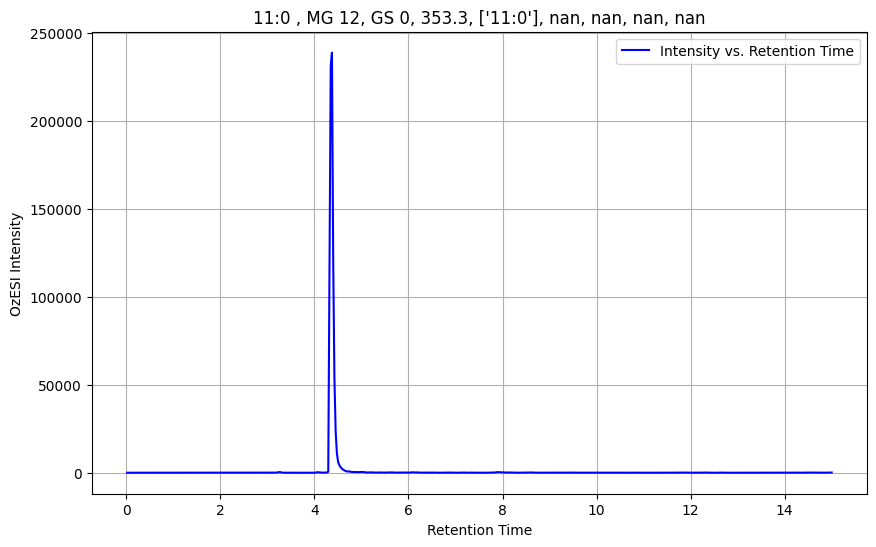

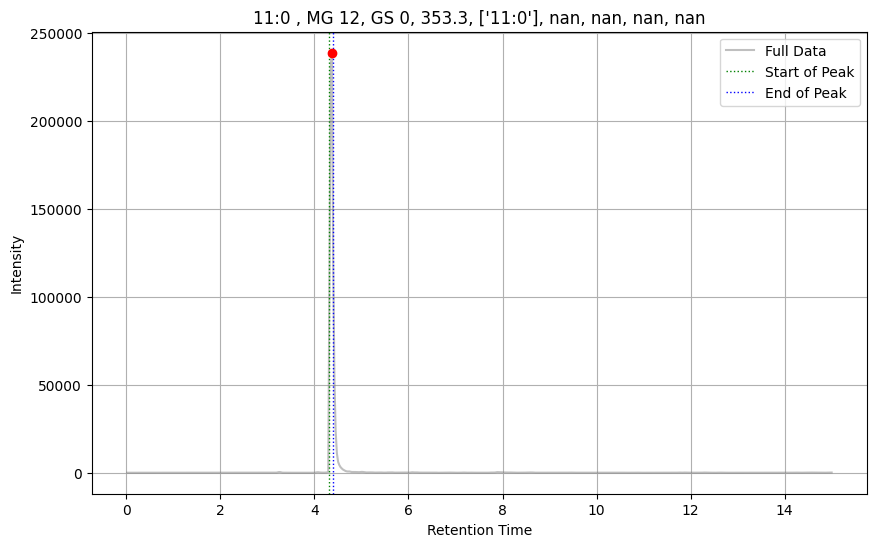

In [35]:
peak_analysis.plot_data_and_peaks(12, group_type='Match_Group')


# plot peak directory

In [36]:
# Define the base directory for saving plots
base_plot_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# Create the directory if it doesn't exist
if not os.path.exists(base_plot_directory):
    os.makedirs(base_plot_directory)
    print(f"Directory created at {base_plot_directory}")
else:
    print(f"Directory already exists at {base_plot_directory}")

# Define a function to generate filenames based on lipid names
def generate_filename(lipid_name):
    safe_lipid_name = lipid_name.replace("/", "-").replace(" ", "_").replace(":", "-")  # Ensure filename is safe for filesystems
    return f"{base_plot_directory}{safe_lipid_name}_OzON.png"



Directory already exists at Projects/AMP/results/fame_mix/plots/on/


In [37]:
peaks_df

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,NaN,4.086000,8.830661e+04,10,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,339.3,183.0,[],NaN,NaN,NaN,NaN,8.830661e+04,4.417383e+04,3.024777,2.671078e+05
1,11:0,4.373650,2.386627e+05,12,0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,353.3,183.0,[11:0],NaN,NaN,NaN,NaN,2.386627e+05,1.193519e+05,2.985645,7.125619e+05
2,12:0,4.818250,7.051023e+05,15,1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,367.3,183.0,[12:0],NaN,NaN,NaN,NaN,7.051023e+05,3.525717e+05,3.481314,2.454683e+06
3,13:0,5.525183,5.041493e+05,18,2,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,381.3,183.0,[13:0],NaN,NaN,NaN,NaN,5.041493e+05,2.520953e+05,3.854480,1.943234e+06
4,14:1(9Z),5.314400,8.342626e+05,20,4,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,393.4,183.0,[14:1],NaN,NaN,NaN,NaN,8.342626e+05,4.171519e+05,3.700393,3.087099e+06
5,14:0,6.337033,1.573355e+06,21,3,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,395.4,183.0,[14:0],NaN,NaN,NaN,NaN,1.573355e+06,7.867077e+05,4.038937,6.354681e+06
6,15:1,6.073350,8.820002e+05,24,6,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,407.2,183.0,[15:1],NaN,NaN,NaN,NaN,8.820002e+05,4.410207e+05,3.952011,3.485674e+06
7,15:1,6.072883,1.323773e+06,25,6,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,407.4,183.0,[15:1],NaN,NaN,NaN,NaN,1.323773e+06,6.619096e+05,3.905462,5.169945e+06
8,15:0,7.279150,8.578846e+05,26,5,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,409.4,183.0,[15:0],NaN,NaN,NaN,NaN,8.578846e+05,4.289629e+05,4.393295,3.768940e+06
9,16:1,6.910983,1.813371e+06,28,8,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,421.4,183.0,[16:1],NaN,NaN,NaN,NaN,1.813371e+06,9.067083e+05,3.982506,7.221760e+06


# Save df

In [40]:
save_df_name = 'FAME_OzOFF.xlsx'
# save df to excel
peaks_df.to_excel(Project_results + save_df_name)
print(f'peaks_df saved to excel in results folder {Project_results}{save_df_name}')


peaks_df saved to excel in results folder ./Projects/AMP/results/fame_mix/FAME_OzOFF.xlsx


# Plots

In [73]:
import os
import pandas as pd
import matplotlib.pyplot as plt

class Plot:
    def __init__(self, dataframe, plot_directory):
        self.dataframe = dataframe
        self.base_plot_directory = plot_directory
        self.ensure_directory_exists()

    def ensure_directory_exists(self):
        """Ensure the base directory for plots exists."""
        if not os.path.exists(self.base_plot_directory):
            os.makedirs(self.base_plot_directory)
            print(f"Directory created at {self.base_plot_directory}")
        else:
            print(f"Directory already exists at {self.base_plot_directory}")

    def generate_filename(self, lipid_name):
        """Generate a safe filename for saving plots based on the lipid name."""
        safe_lipid_name = lipid_name.replace("/", "-").replace(" ", "_").replace(":", "-")
        return f"{self.base_plot_directory}/{safe_lipid_name}_OzON.png"

    def scatter(self):
        """Create a scatter plot of Peak Area by Lipid."""
        grouped = self.dataframe.groupby('Lipid')
        fig, ax = plt.subplots(figsize=(10, 6))
        for (key, group), color in zip(grouped, plt.cm.tab20.colors):
            ax.scatter(group['Lipid'], group['Peak_Area'], label=str(key), color=color, s=100)

        ax.set_xlabel('Lipid')
        ax.set_ylabel('Peak Area')
        ax.set_title('Peak Area by Lipid')
        ax.set_xticks([i for i, _ in enumerate(grouped.groups.keys())])
        ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')
        ax.legend(title='Lipid', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

    def plot_bar(self):
        """Create a bar plot of Peak Area by Lipid."""
        grouped = self.dataframe.groupby('Lipid')
        fig, ax = plt.subplots(figsize=(10, 6))
        bar_width = 0.35
        num_groups = len(grouped.groups.keys())
        indices = list(range(num_groups))

        for i, (key, group) in enumerate(grouped):
            positions = [x + bar_width * i for x in indices]
            normalized_peak_areas = [group[group['Lipid'] == lipid]['Peak_Area'].sum() for lipid in grouped.groups.keys()]
            ax.bar(positions, normalized_peak_areas, width=bar_width, label=str(key))

        ticks_positions = [i + bar_width * (num_groups / 2) - bar_width / 2 for i in indices]
        ax.set_xticks(ticks_positions)
        ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')
        ax.set_xlabel('Lipid')
        ax.set_ylabel('Peak Area')
        ax.set_title('Peak Area by Lipid')
        ax.legend(title='Lipid', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()


In [74]:
# Define the directory where the plots should be saved
plots_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# Creating an instance of Plot class with the specified directory
plot_instance = Plot(dataframe=peaks_df, plot_directory=plots_directory)




Directory already exists at Projects/AMP/results/fame_mix/plots/on/


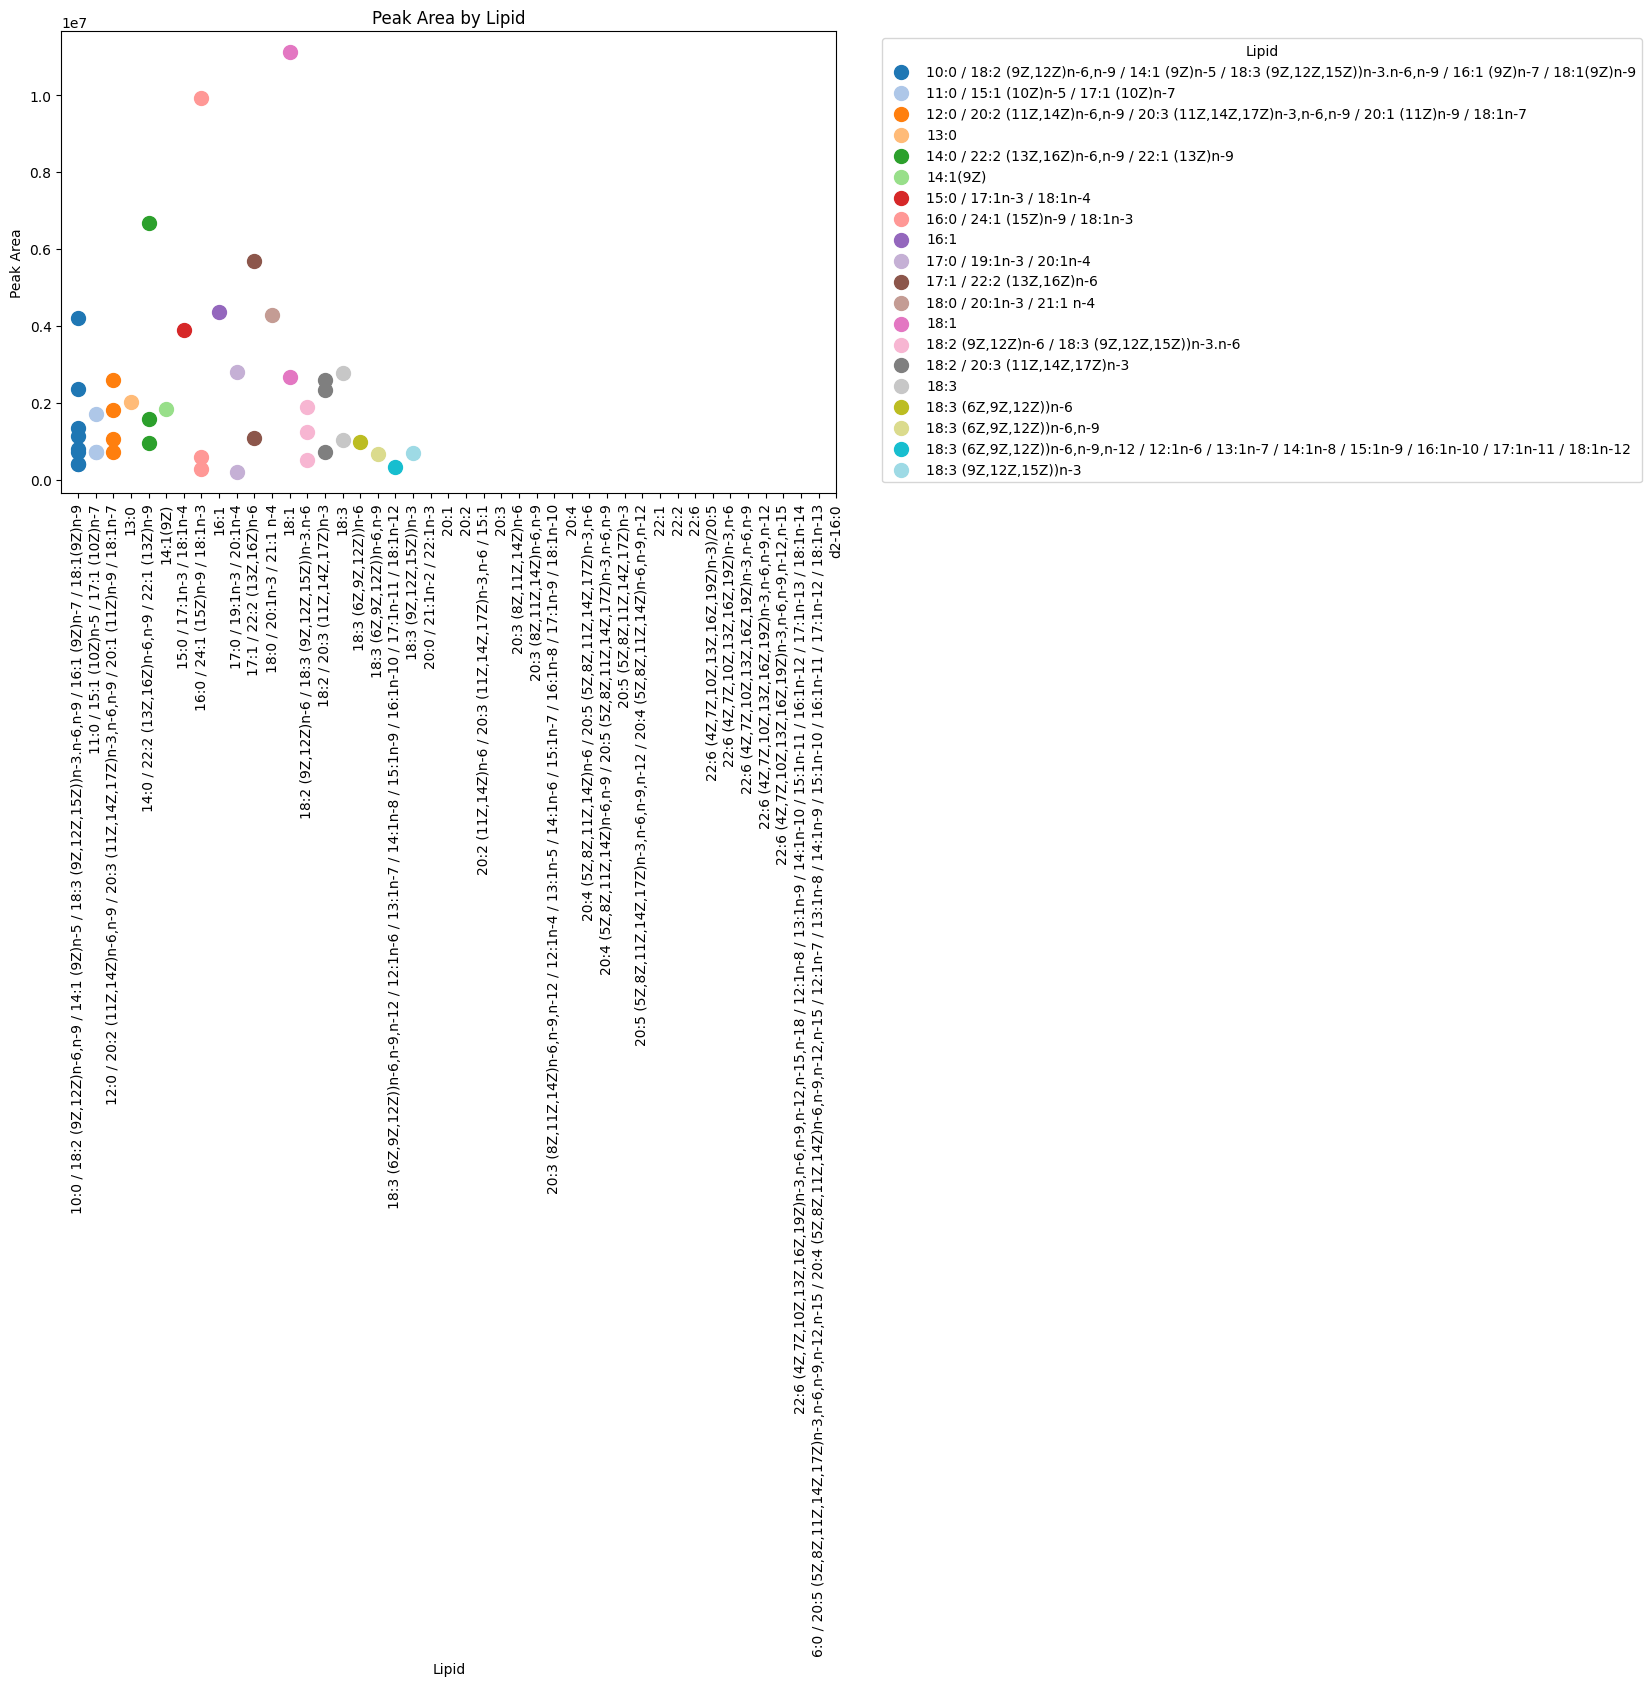

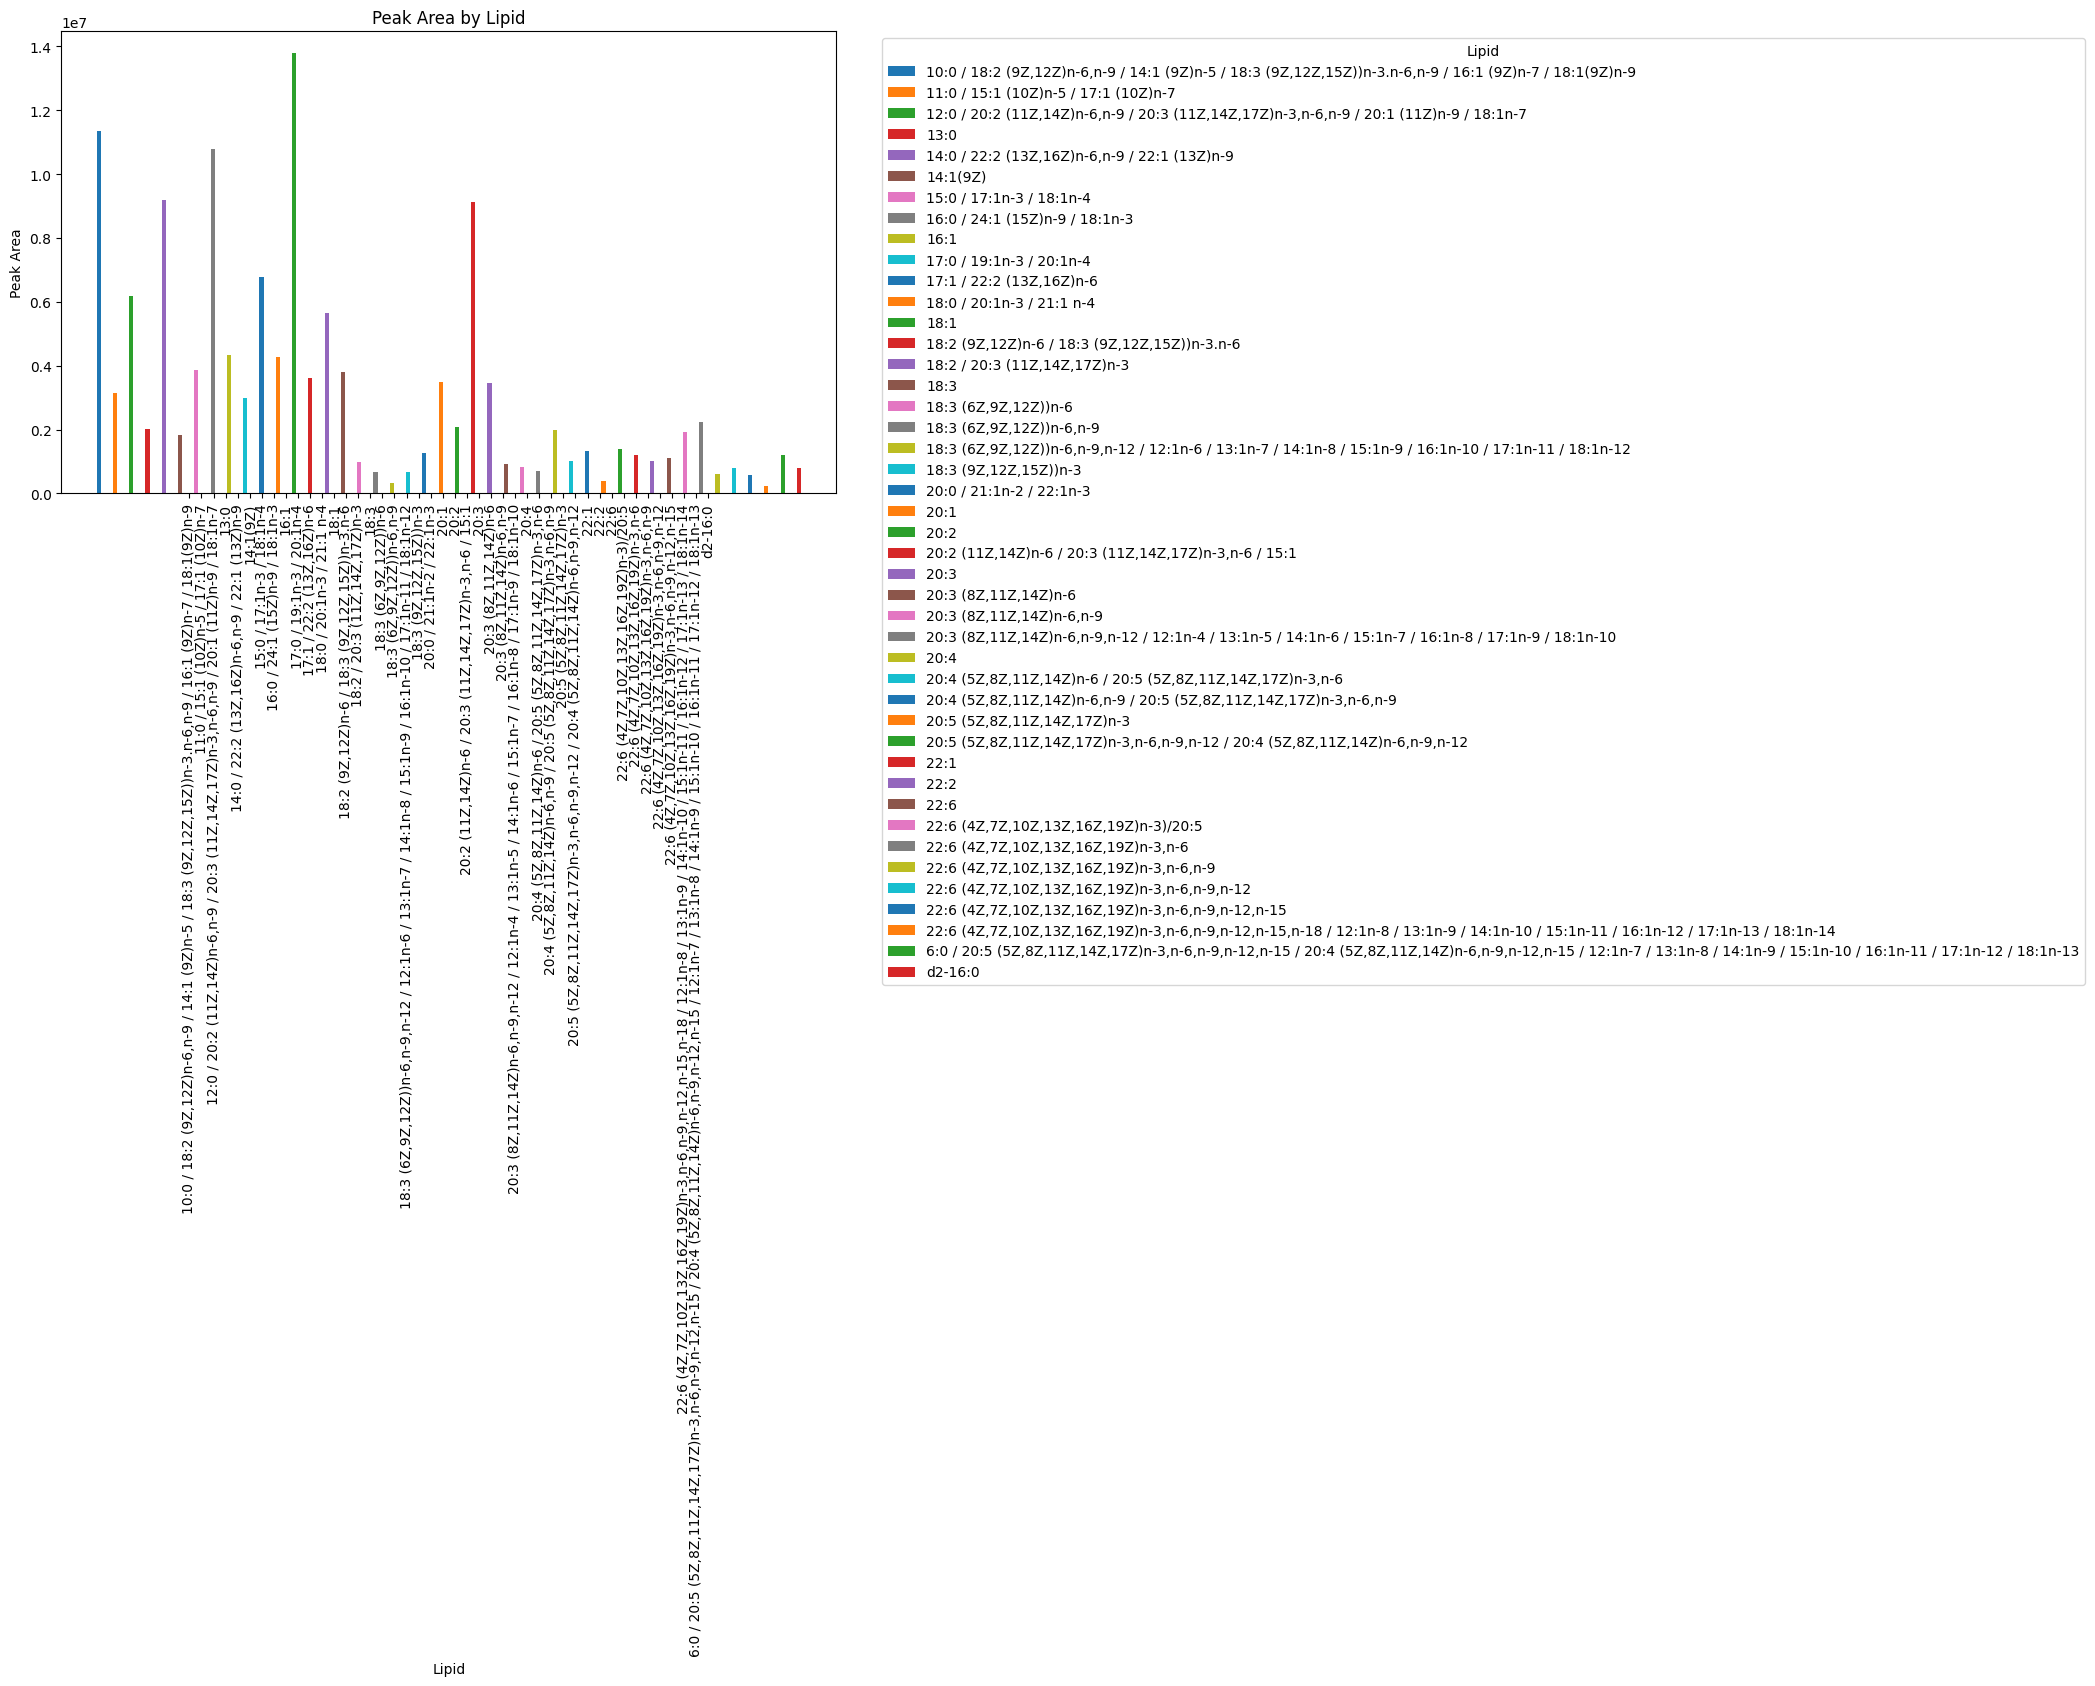

In [75]:
# Calling the scatter method to plot data
plot_instance.scatter()

# Calling the plot_bar method to display bar charts
plot_instance.plot_bar()

Plotting Class

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

class Plot:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def scatter(self):
        # Grouping the data by 'Lipid'
        grouped = self.dataframe.groupby('Lipid')

        # Creating the plot
        fig, ax = plt.subplots(figsize=(10, 6))
        for (key, group), color in zip(grouped, plt.cm.tab20.colors):
            ax.scatter(group['Lipid'], group['Peak_Area'], label=str(key), color=color, s=100)  # Using ax.scatter for clarity

        # Setting labels and title
        ax.set_xlabel('Lipid')
        ax.set_ylabel('Peak Area')
        ax.set_title('Peak Area by Lipid')

        # Setting x-tick positions and labels
        ax.set_xticks([i for i, _ in enumerate(grouped.groups.keys())])  # Setting x-ticks positions
        ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')  # Making x-tick labels vertical

        # Adding a legend
                # Adding a legend outside the plot
        ax.legend(title='Lipid', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Displaying the plot
        plt.show()

    def plot_bar(self):
        # Grouping the data by 'Lipid'
        grouped = self.dataframe.groupby('Lipid')

        # Creating the plot
        fig, ax = plt.subplots(figsize=(10, 6))
        bar_width = 0.35  # Define the width of each bar
        num_groups = len(grouped.groups.keys())
        indices = list(range(num_groups))  # Creating indices for the x-axis

        # Plotting a bar for each group
        for i, (key, group) in enumerate(grouped):
            # Prepare positions for bars
            positions = [x + bar_width * i for x in indices]

            # Normalize the group to ensure all indices are covered
            normalized_peak_areas = [group[group['Lipid'] == lipid]['Peak_Area'].sum() for lipid in grouped.groups.keys()]
            ax.bar(positions, normalized_peak_areas, width=bar_width, label=str(key))

        # Adjusting x-tick positions and labels to center them under each group of bars
        ticks_positions = [i + bar_width * (num_groups / 2) - bar_width / 2 for i in indices]
        ax.set_xticks(ticks_positions)
        ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')  # Making x-tick labels vertical

        # Setting labels and title
        ax.set_xlabel('Lipid')
        ax.set_ylabel('Peak Area')
        ax.set_title('Peak Area by Lipid')
    

        # Adding a legend
            # Adding a legend outside the plot
        ax.legend(title='Lipid', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Displaying the plot
        plt.show()

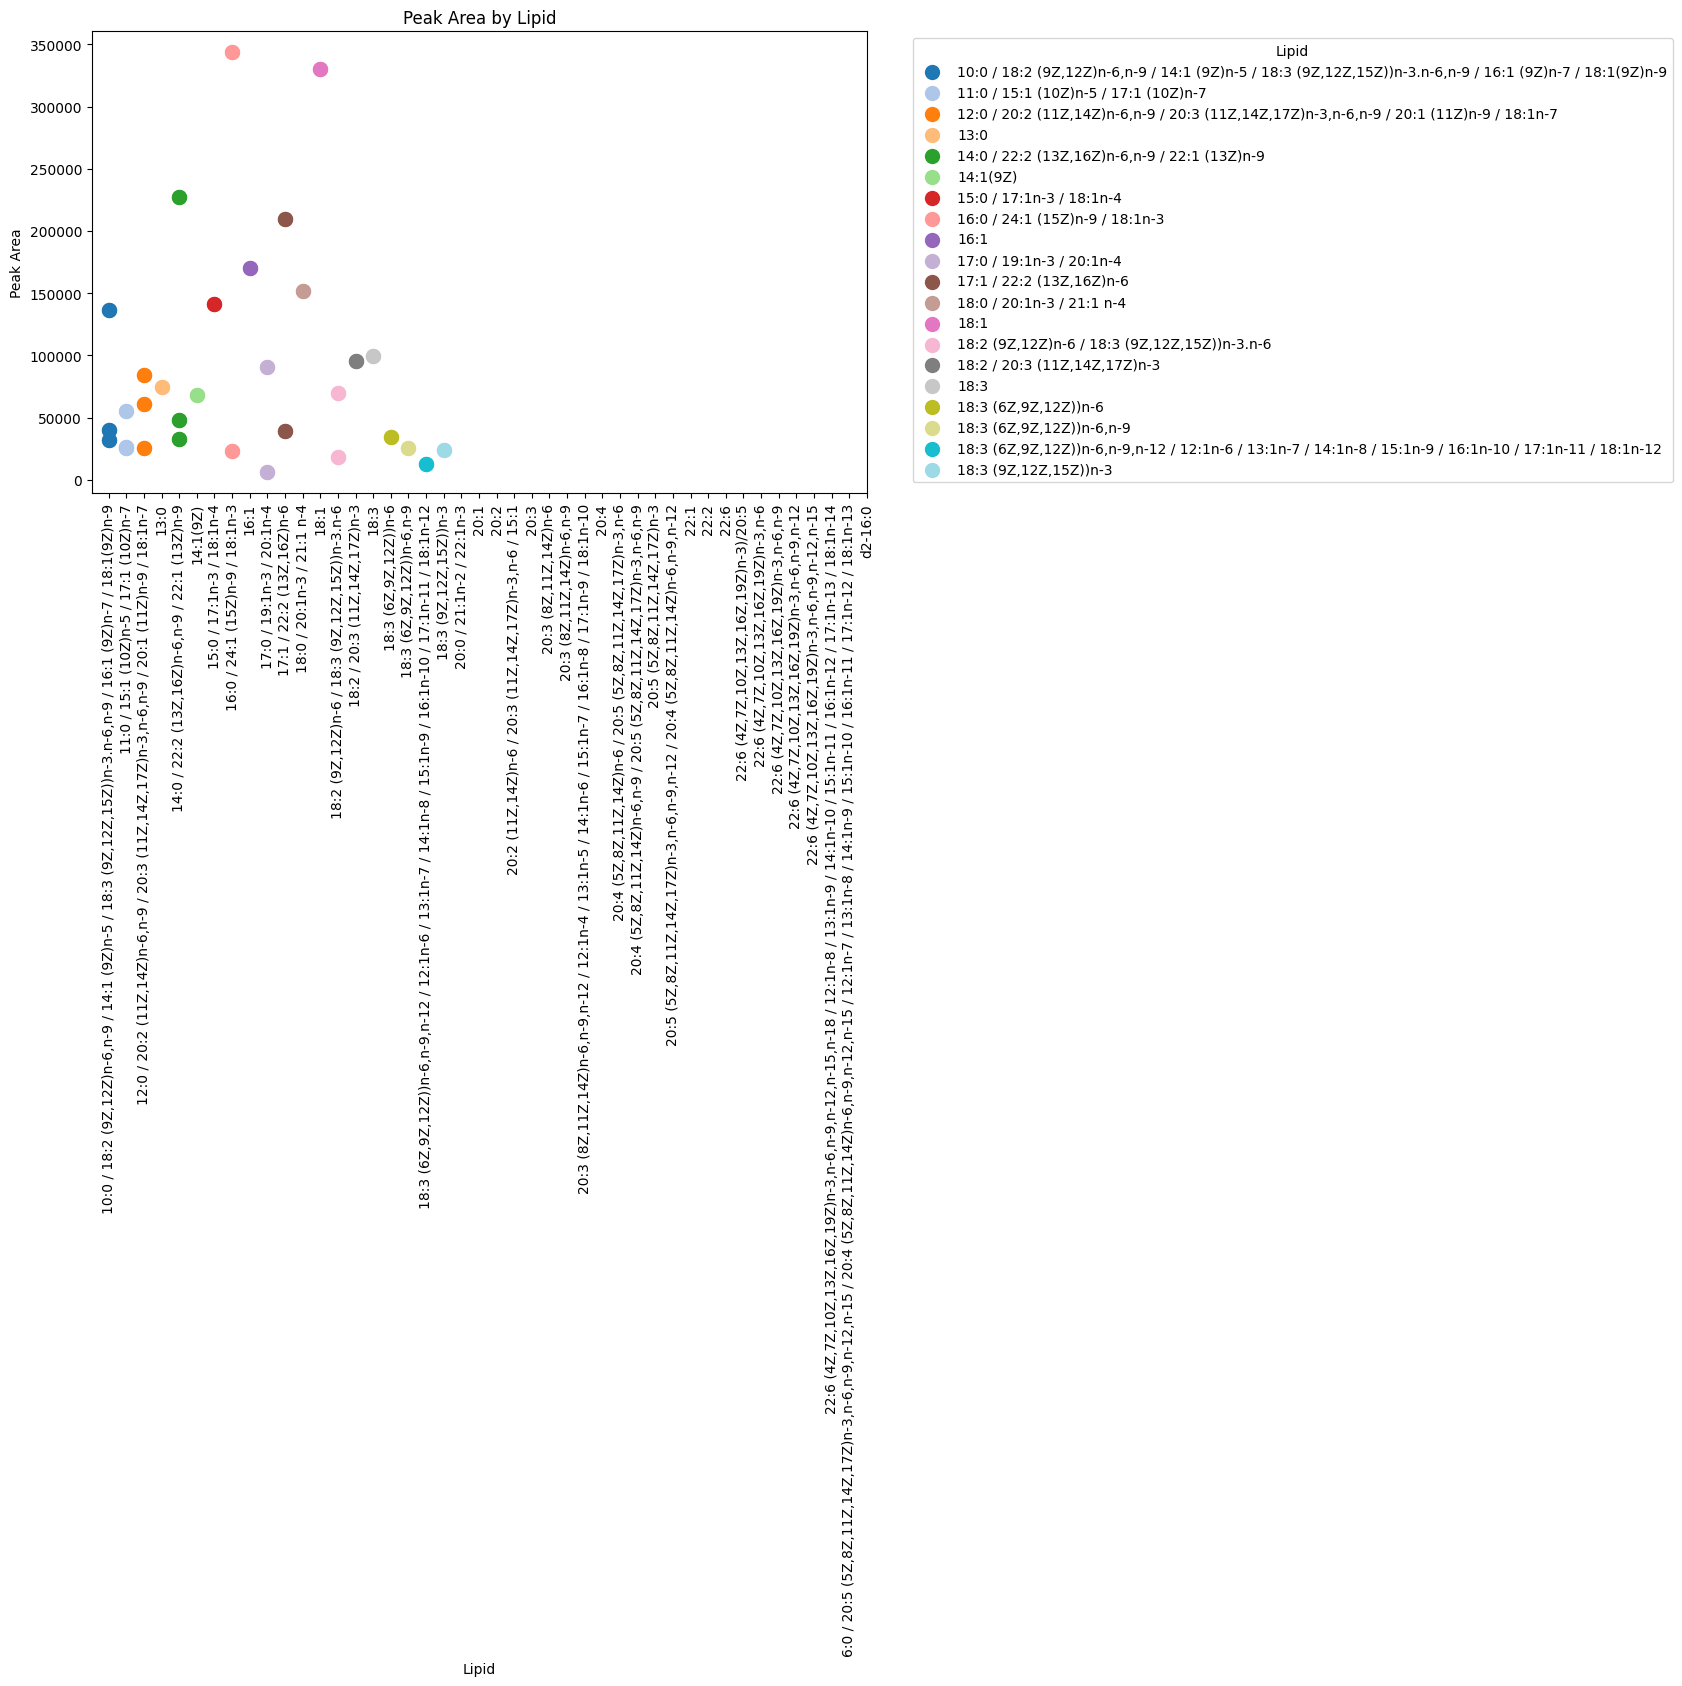

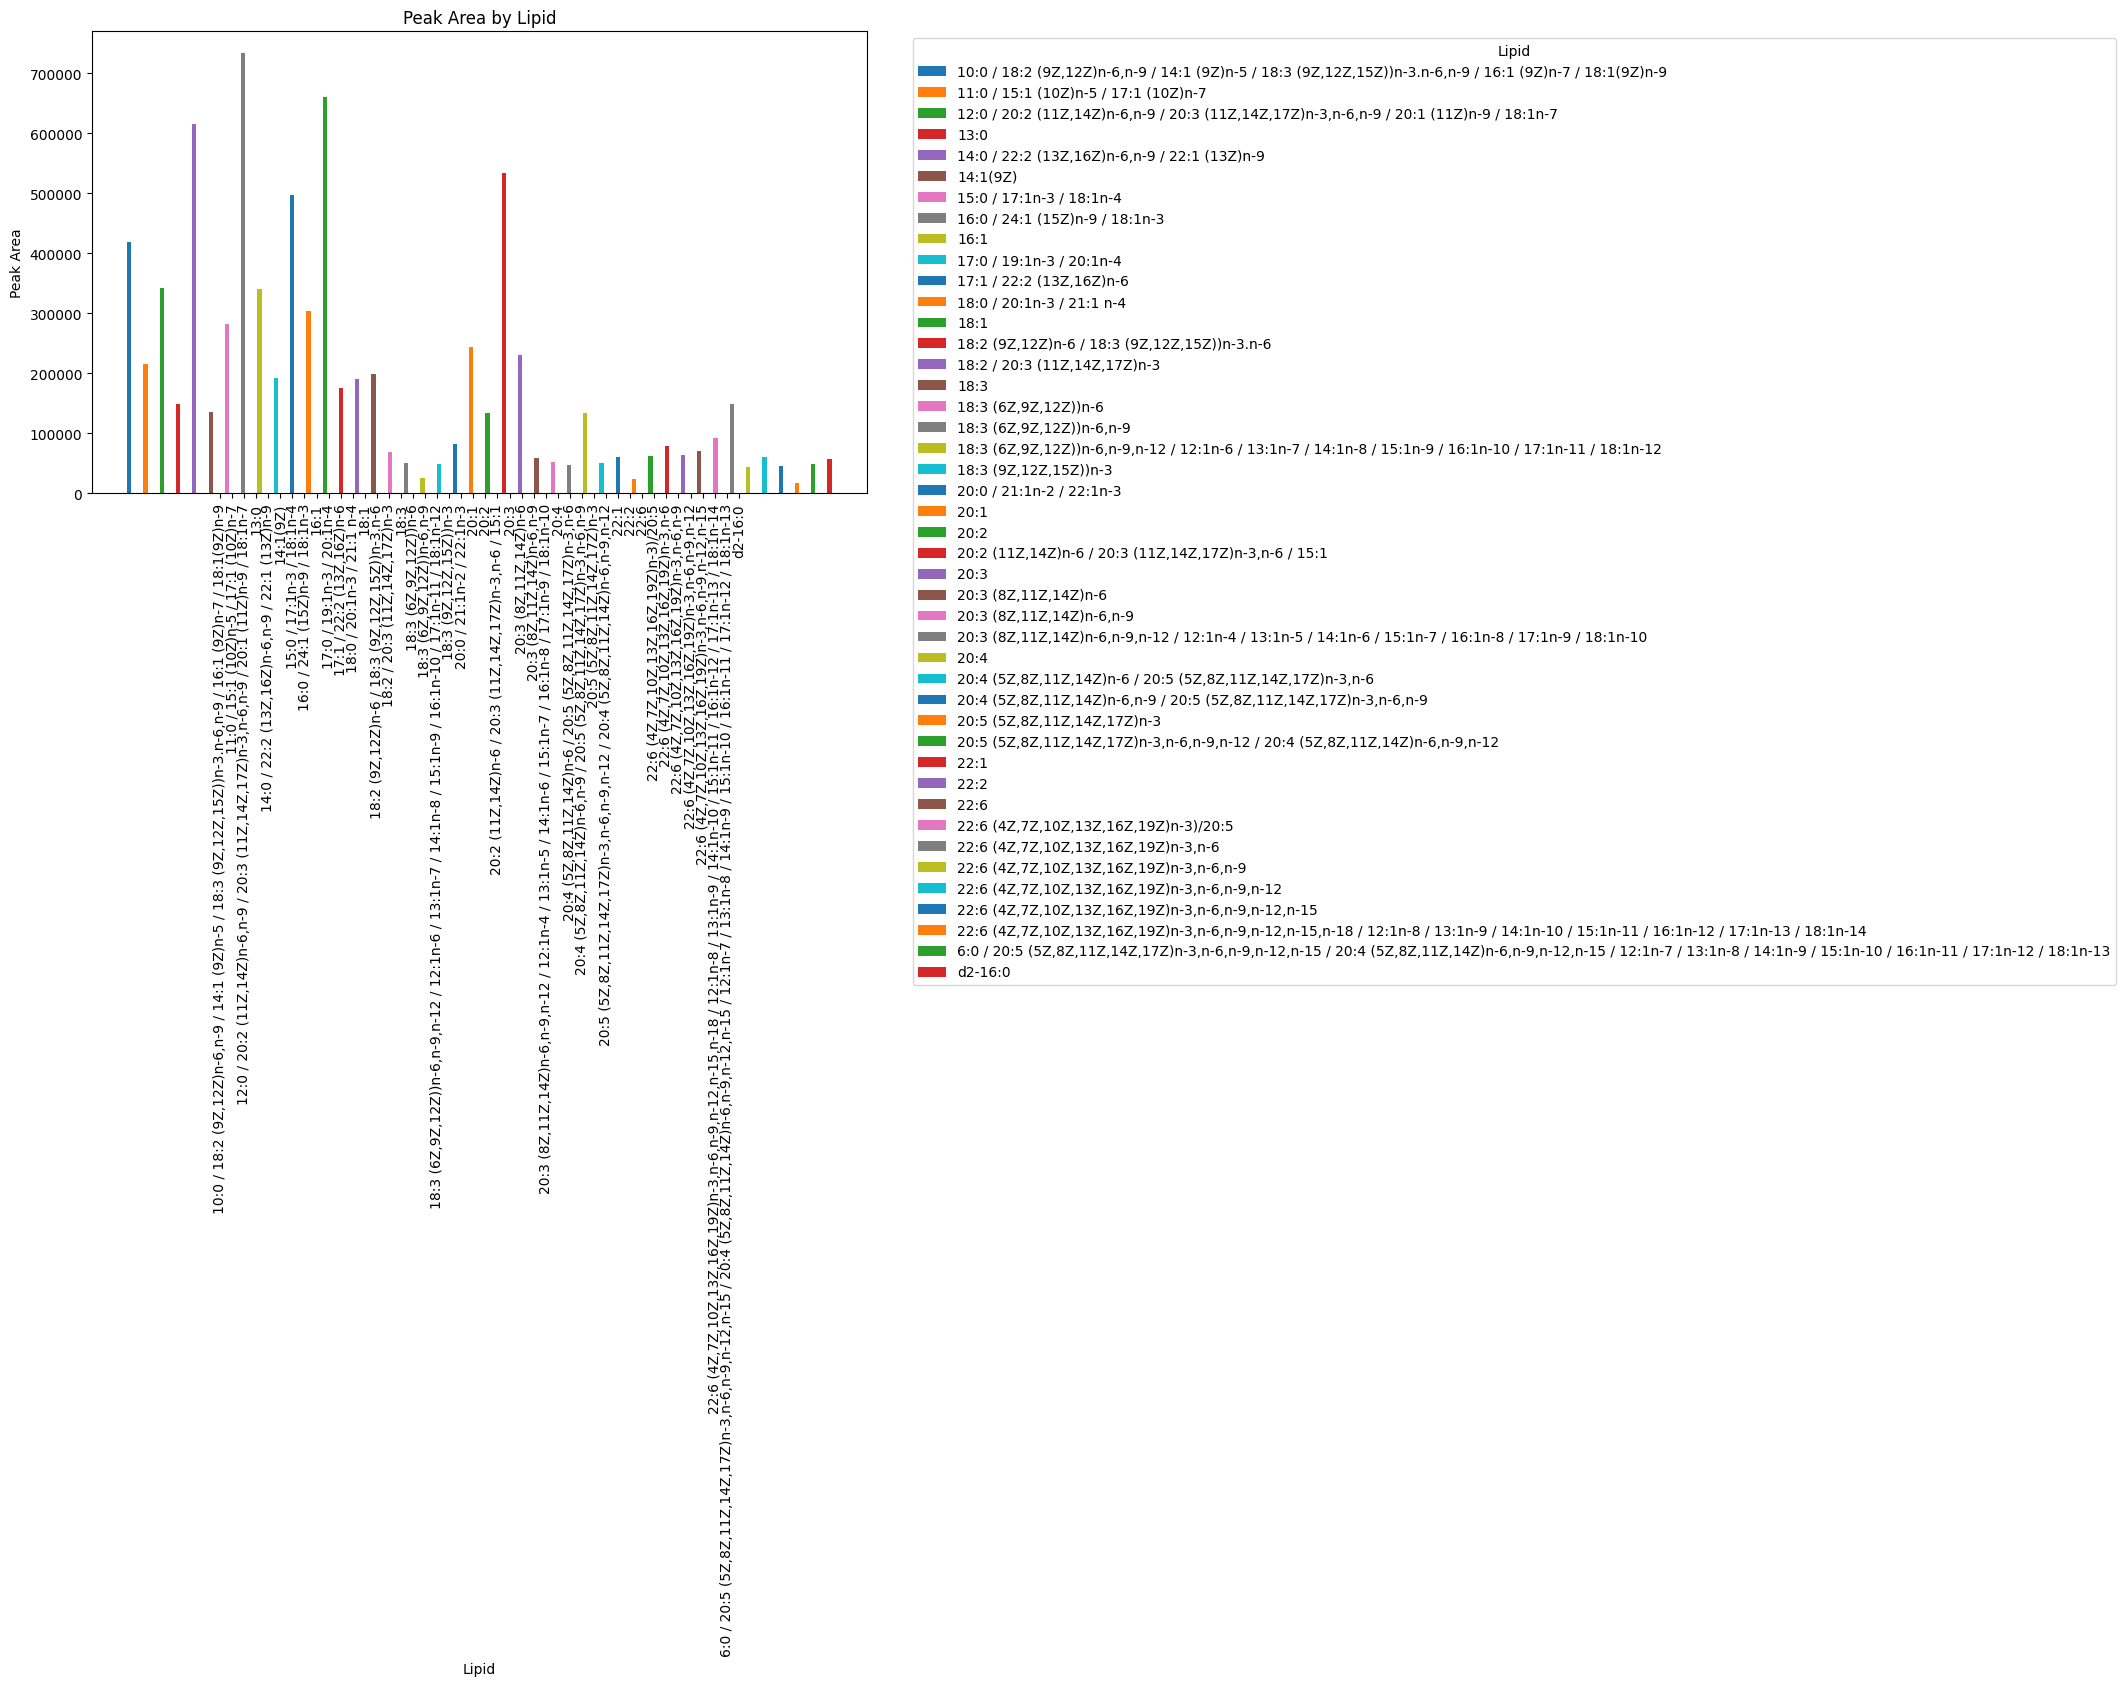

In [42]:
# Creating an instance of Plot class
plot_instance = Plot(d2)

# Calling the scatter method
plot_instance.scatter()

# Calling the plot_bar method
plot_instance.plot_bar()

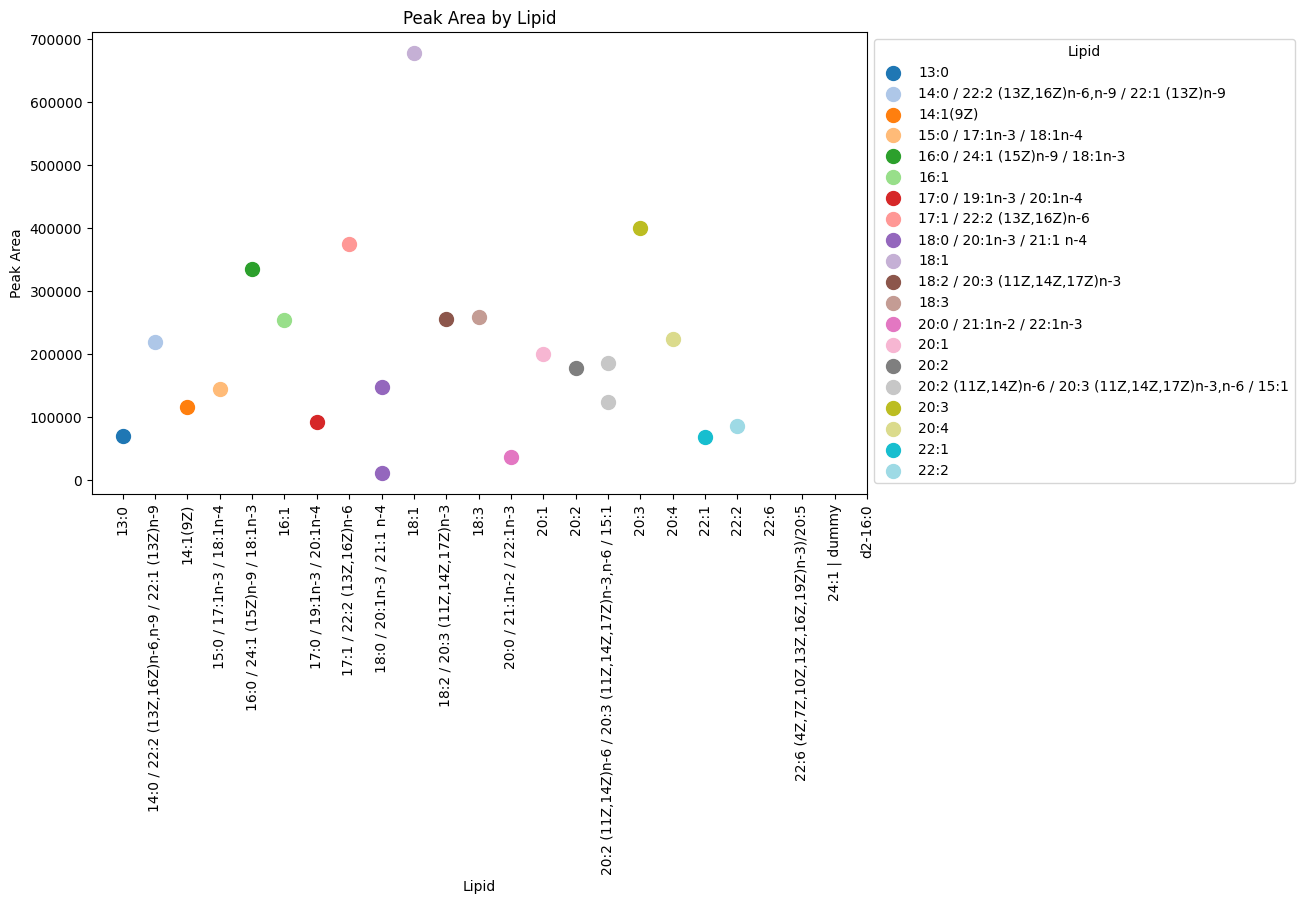

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'd2' is defined as above
grouped = d2.groupby(['Lipid'])

fig, ax = plt.subplots(figsize=(10, 6))
for (key, group), color in zip(grouped, plt.cm.tab20.colors):
    ax.scatter(group['Lipid'], group['Peak_Area'], label=str(key), color=color, s=100)  # Use ax.scatter directly for clarity

ax.set_xlabel('Lipid')
ax.set_ylabel('Peak Area')
ax.set_title('Peak Area by Lipid')

# Set the labels of the x-axis ticks to be vertical
ax.set_xticks([i for i, _ in enumerate(grouped.groups.keys())])  # Setting x-ticks positions
ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')  # Setting x-ticks labels vertically

# Place the legend outside the plot on the right side
ax.legend(title='Lipid', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


# bar plots seperate

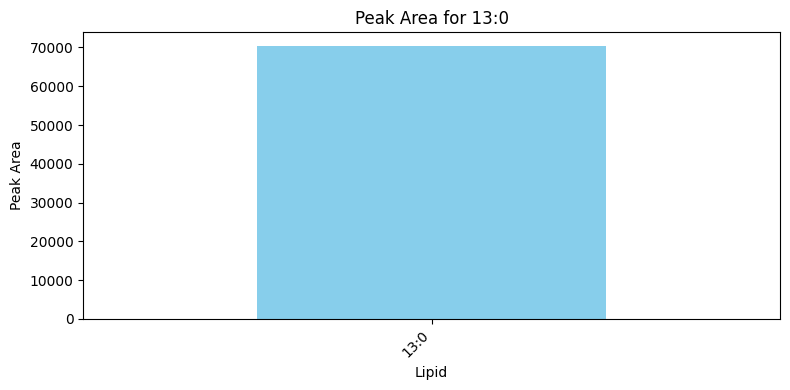

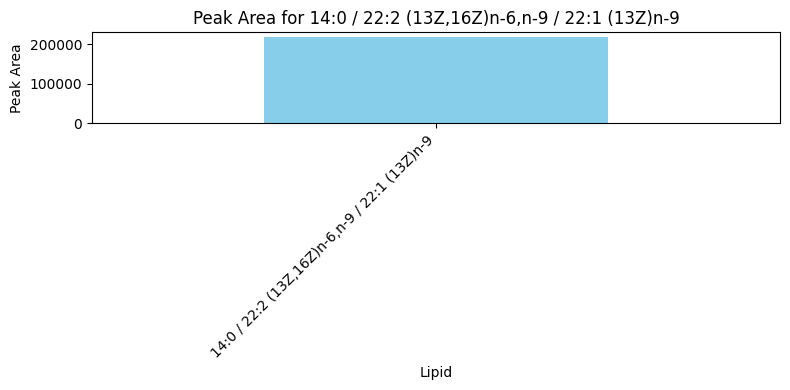

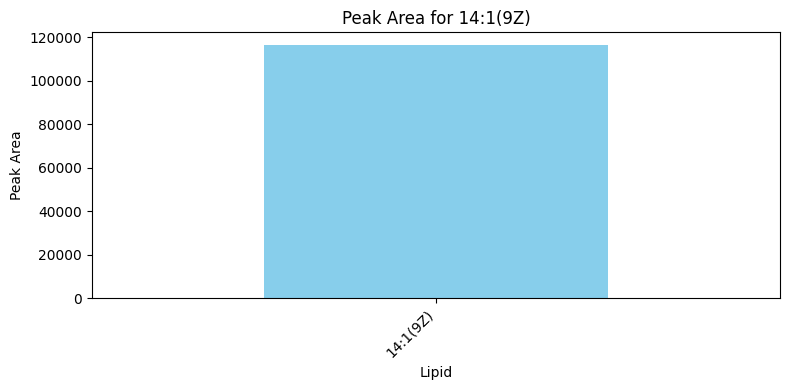

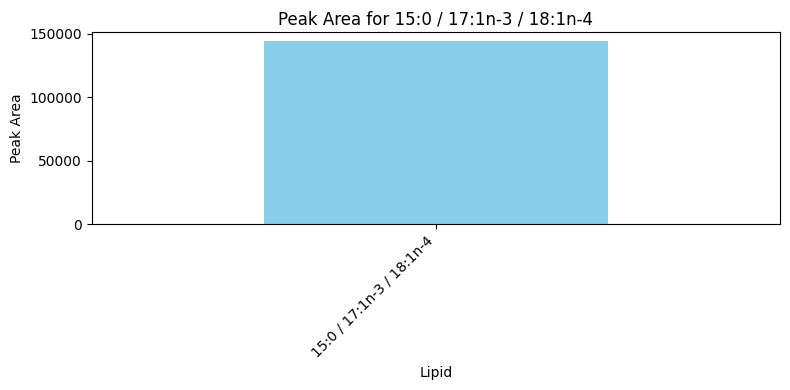

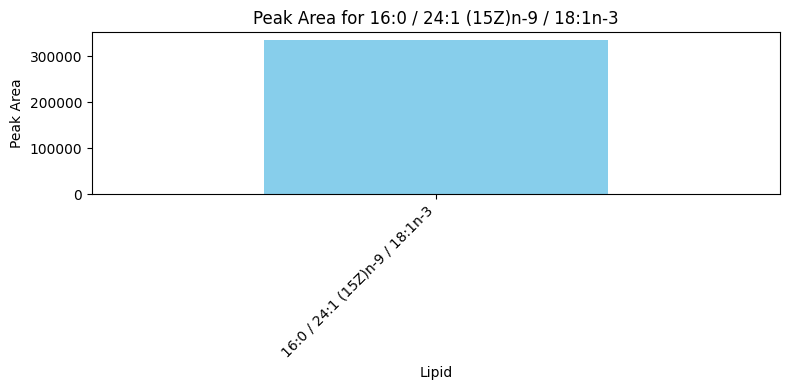

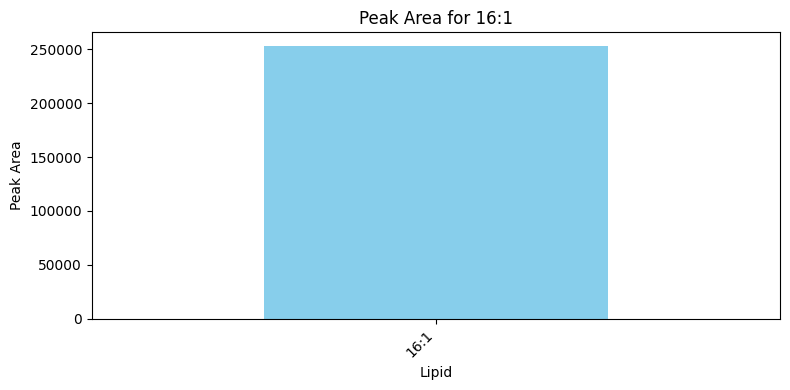

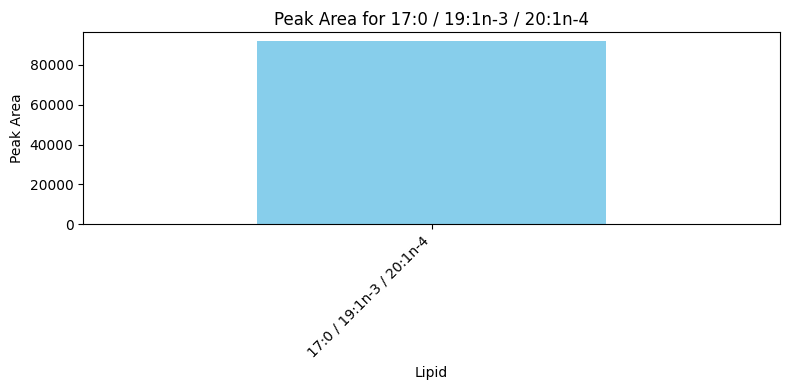

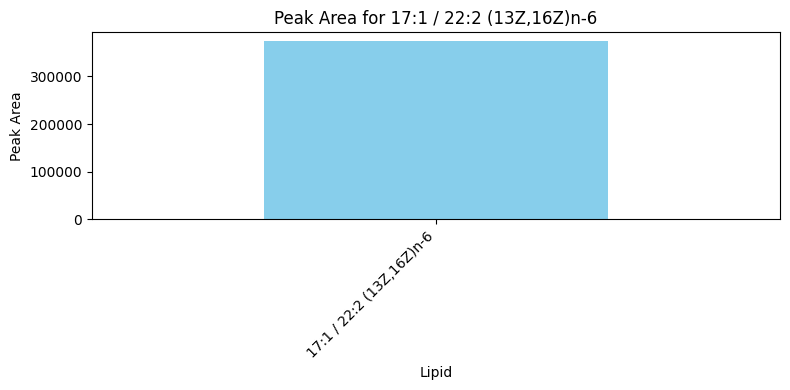

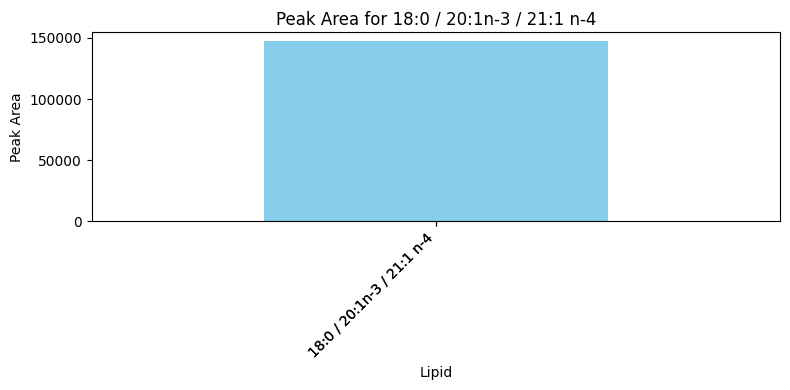

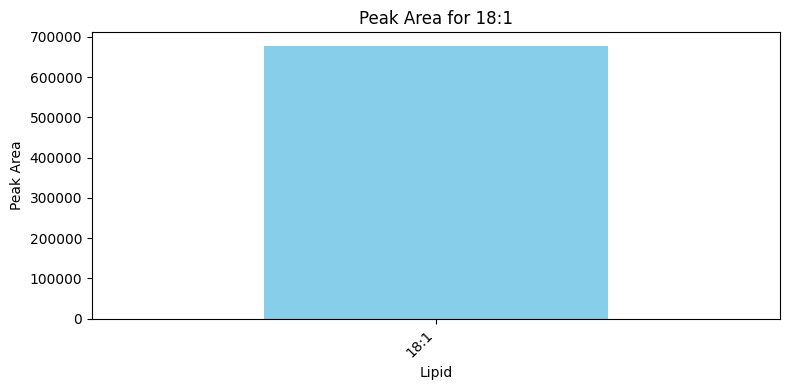

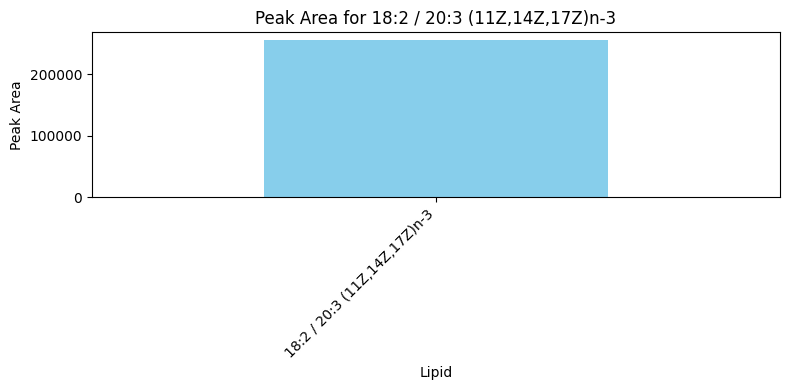

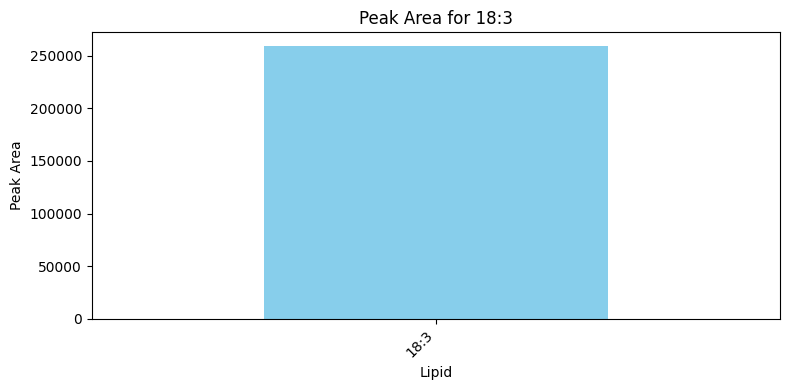

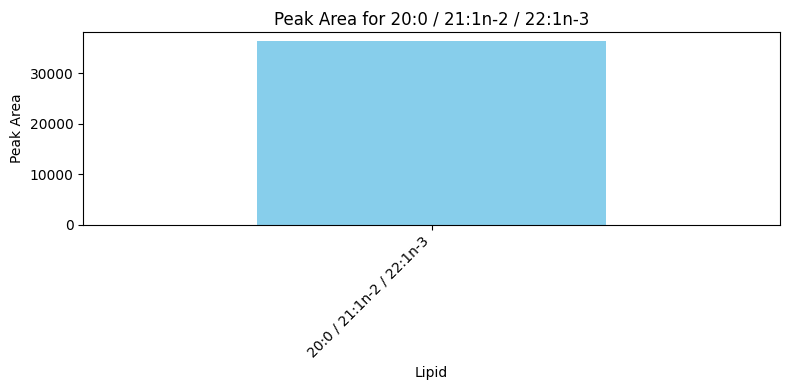

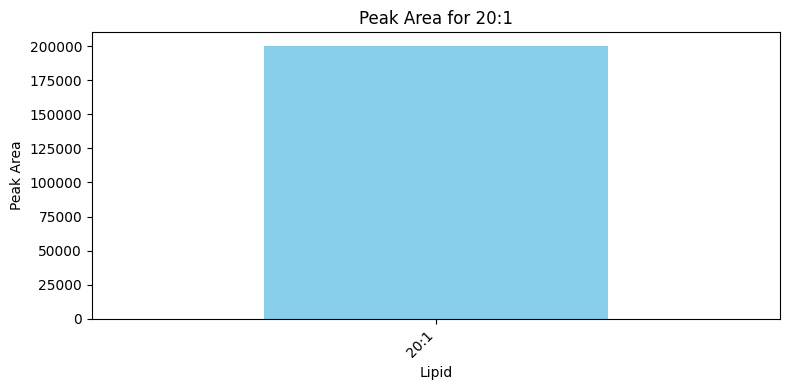

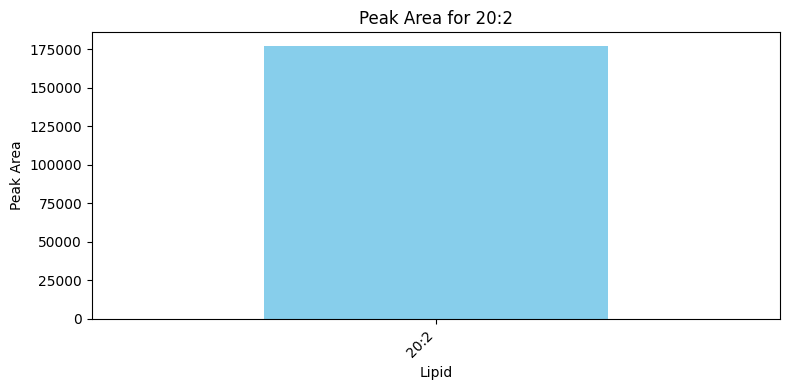

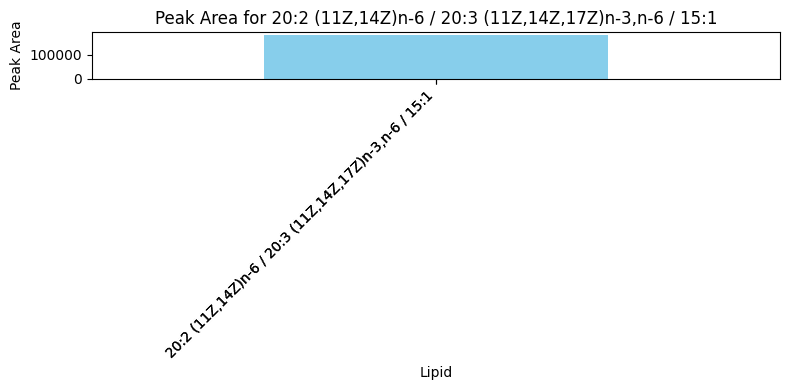

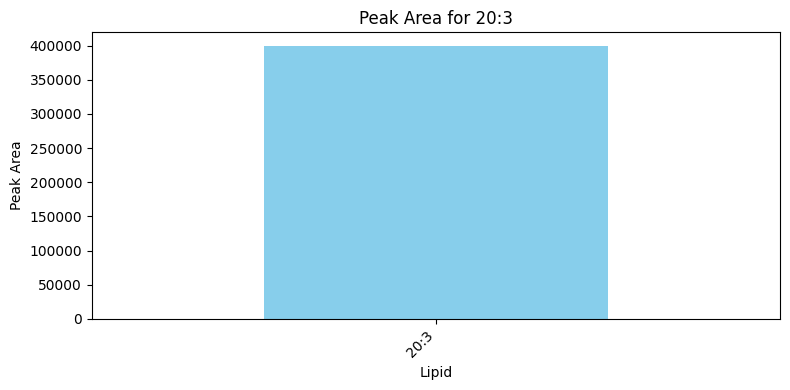

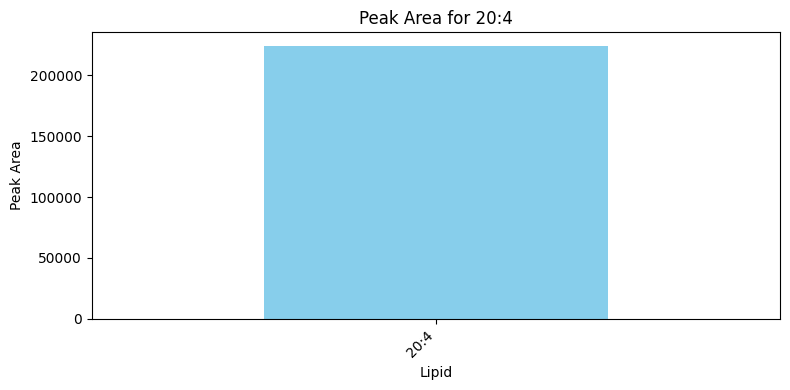

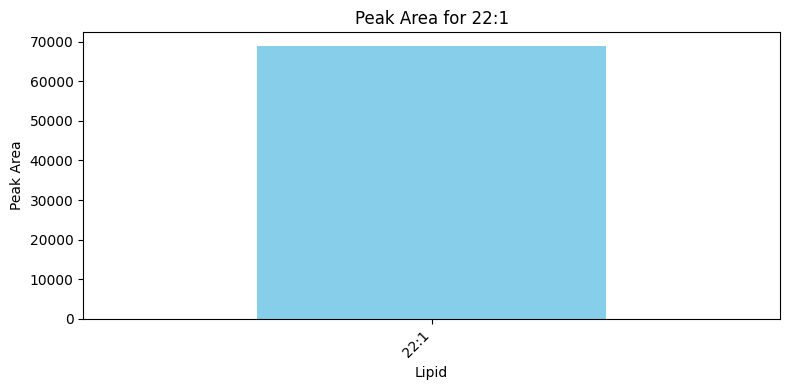

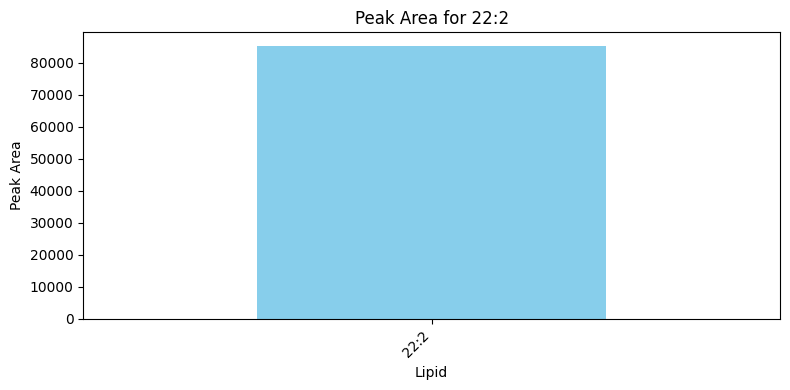

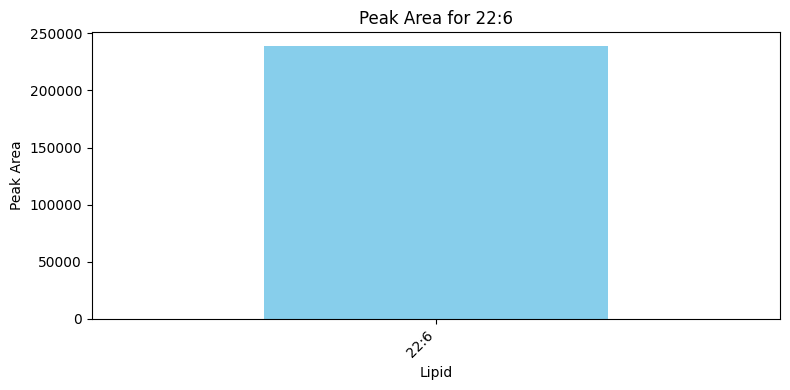

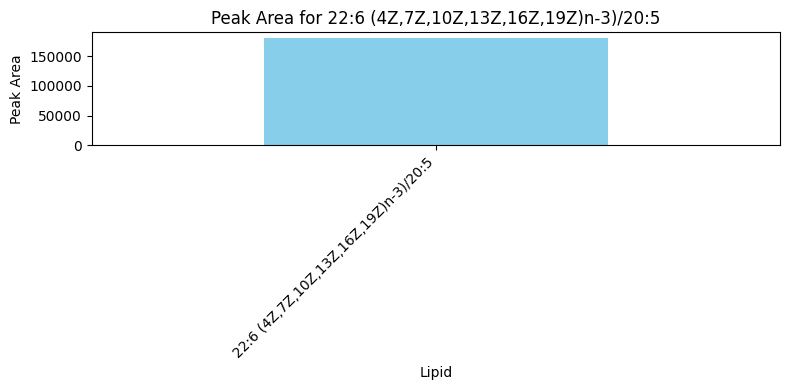

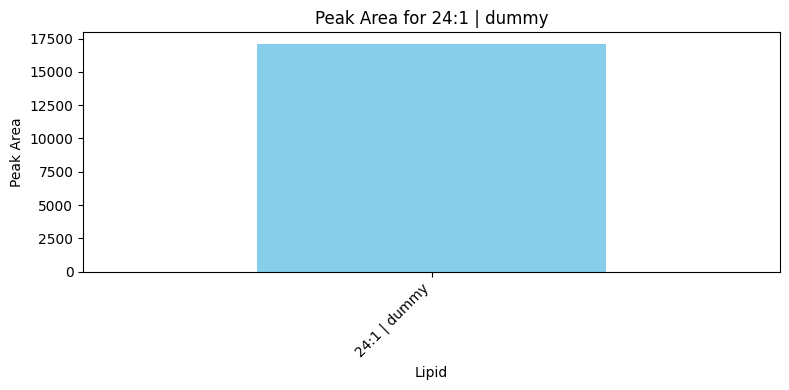

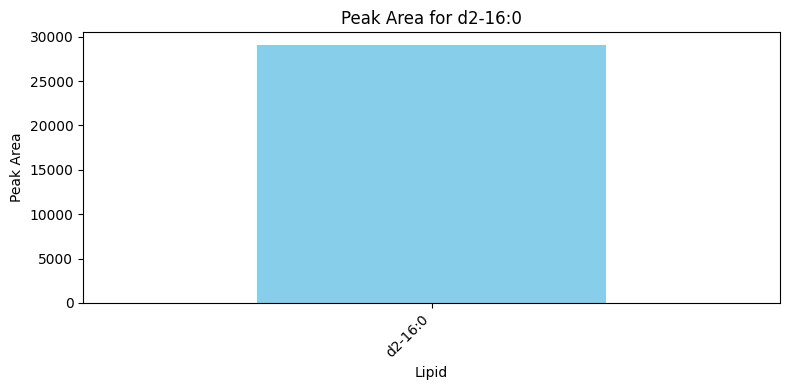

In [26]:
import matplotlib.pyplot as plt

# Assuming 'd2' is your DataFrame that has been loaded or defined previously

# Group by the combination of Biology, Genotype, Cage, and Mouse
grouped = d2.groupby(['Lipid'])

# Plotting each group separately
for name, group in grouped:
    fig, ax = plt.subplots(figsize=(8, 4))  # Create a figure and an axes for each group.
    group.plot(kind='bar', x='Lipid', y='Peak_Area', ax=ax, legend=False, color='skyblue')
    ax.set_title(f'Peak Area for {name}')  # Set title with group details
    ax.set_xlabel('Lipid')
    ax.set_ylabel('Peak Area')
    ax.set_xticklabels(group['Lipid'], rotation=45, ha='right')

    plt.tight_layout()  # Adjust layout to make room for rotated x-labels
    plt.show()  # Display the plot


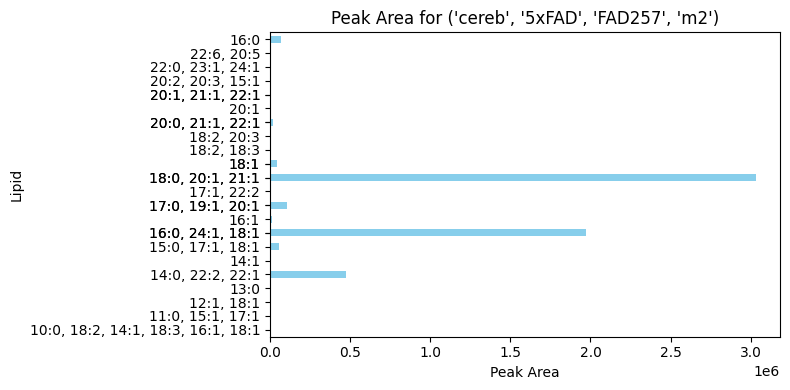

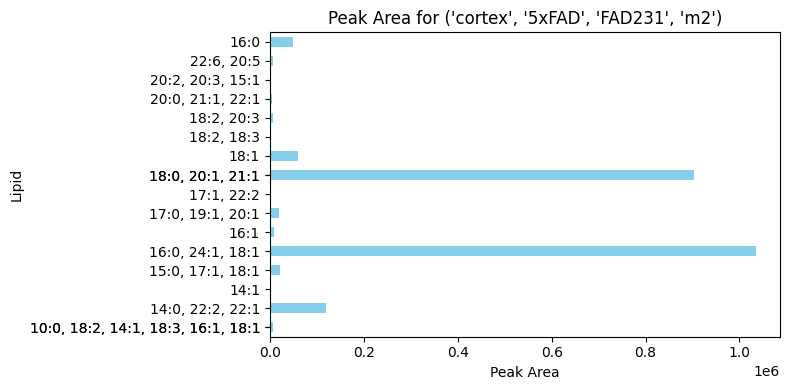

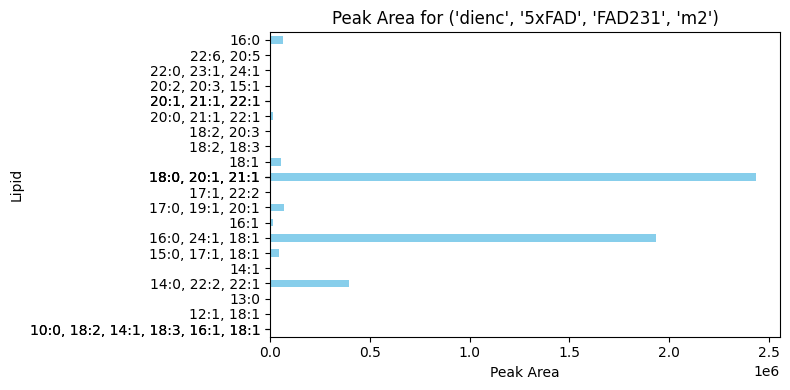

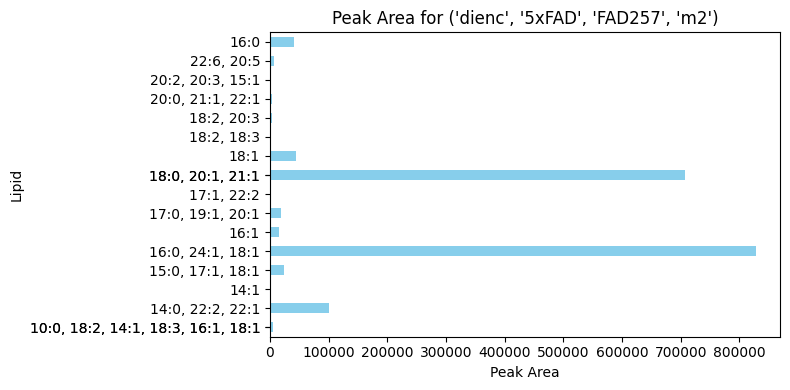

In [ ]:
import matplotlib.pyplot as plt
import re  # Import regular expression module

# Assuming 'd2' is your DataFrame that has been loaded or defined previously

# Group by the combination of Biology, Genotype, Cage, and Mouse
grouped = d2.groupby(['Biology', 'Genotype', 'Cage', 'Mouse'])

# Plotting each group separately
for name, group in grouped:
    fig, ax = plt.subplots(figsize=(8, 4))  # Create a figure and an axes for each group.
    
    # Modify lipid names to include all '##:#' formats, joining them if multiple are found
    group['Simple_Lipid'] = group['Lipid'].apply(lambda x: ', '.join(re.findall(r'\d+:\d+', x)) if re.findall(r'\d+:\d+', x) else x)

    # Plot with modified names
    group.plot(kind='barh', x='Simple_Lipid', y='Peak_Area', ax=ax, legend=False, color='skyblue')  # Horizontal bar plot
    ax.set_title(f'Peak Area for {name}')  # Set title with group details
    ax.set_ylabel('Lipid')  # Set y-axis label to 'Lipid'
    ax.set_xlabel('Peak Area')  # Set x-axis label to 'Peak Area'
    ax.set_yticklabels(group['Simple_Lipid'], rotation=0)  # Set y-tick labels without rotation

    plt.tight_layout()  # Adjust layout to make room for labels
    plt.show()  # Display the plot
